In [1]:
pip install numpy pandas statsmodels seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from mediation import Mediation

ModuleNotFoundError: No module named 'mediation'

In [35]:
# The original dataset = https://docs.google.com/spreadsheets/d/1EZpXI6FRaHXIr00FxLeF740qzWeEa1TU/edit?usp=sharing&ouid=108751566147535657367&rtpof=true&sd=true
# My submitted pitch deck for this task = https://drive.google.com/file/d/1WuezsdESVH0WarakbhIdou4tDg1FmnA1/view?usp=sharing

df = pd.read_excel('Task Python.xlsx')
df

,YEAR,TV CHANNEL,INDUSTRY SECTOR,ADVERTISER,REVENUE
0,2018,TV A,FOOD,ABC GROUP,15462000000
1,2018,TV A,FOOD,AJINOMOTO INDONESIA PT,10509000000
2,2018,TV A,FOOD,GARUDA FOOD GROUP,39543000000
3,2018,TV A,FOOD,INDOFOOD GROUP,128604000000
4,2018,TV A,FOOD,JAPFA,3315000000
...,...,...,...,...,...
3685,2021,TV L,ONLINE SERVICES,"RUANG RAYA INDONESIA, PT",6855000000
3686,2021,TV L,ONLINE SERVICES,"SHOPEE INTERNATIONAL INDONESIA, PT",6972000000
3687,2021,TV L,ONLINE SERVICES,"TOKOPEDIA, PT.",7386000000
3688,2021,TV M,BEVERAGES,JAVA PRIMA ABADI,51000000


In [5]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['INDUSTRY SECTOR'])
encoded_labels2 = label_encoder.fit_transform(df['TV CHANNEL'])

In [6]:
one_hot_encoded = pd.get_dummies(df['INDUSTRY SECTOR'], prefix='category')
one_hot_encoded2 = pd.get_dummies(df['TV CHANNEL'], prefix='category')

In [8]:
# Check for NaN and infinity values in each column
nan_check = one_hot_encoded.isna().any()
inf_check = one_hot_encoded.isin([np.inf, -np.inf]).any()

print("NaN Check:")
print(nan_check)

print("\nInfinity Check:")
print(inf_check)

NaN Check:
category_AUTOMOTIVE & ACCESSORIES                  False
category_BABY & MATERNITY PRODUCT                  False
category_BEVERAGES                                 False
category_FOOD                                      False
category_HOUSEHOLD PRODUCTS/SUPPLIES               False
category_INDUSTRIAL PRODUCTS                       False
category_MEDICINES/PHARMACEUTICALS                 False
category_OFFICE EQP'T, COMPUTER, COMMUNICATIONS    False
category_ONLINE SERVICES                           False
category_SMOKING & ACCESSORIES                     False
category_TOILETRIES & COSMETICS                    False
dtype: bool

Infinity Check:
category_AUTOMOTIVE & ACCESSORIES                  False
category_BABY & MATERNITY PRODUCT                  False
category_BEVERAGES                                 False
category_FOOD                                      False
category_HOUSEHOLD PRODUCTS/SUPPLIES               False
category_INDUSTRIAL PRODUCTS                    

In [5]:
# Load the Excel file
file_path = 'Task Python.xlsx'
sheet_name = 'Sheet1'  # Replace with your sheet name
column_name = 'INDUSTRY SECTOR'  # Replace with the column name
value_column = 'REVENUE'  # Replace with the column containing values to calculate the mean

# Read the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Group data by unique categories and calculate mean
grouped_data = data.groupby(column_name)[value_column].mean()

print(grouped_data)

INDUSTRY SECTOR
AUTOMOTIVE & ACCESSORIES                  6.587581e+09
BABY & MATERNITY PRODUCT                  3.690354e+09
BEVERAGES                                 2.039162e+10
FOOD                                      2.433493e+10
HOUSEHOLD PRODUCTS/SUPPLIES               9.810711e+09
INDUSTRIAL PRODUCTS                       7.388522e+09
MEDICINES/PHARMACEUTICALS                 1.397484e+10
OFFICE EQP'T, COMPUTER, COMMUNICATIONS    9.312854e+09
ONLINE SERVICES                           1.647325e+10
SMOKING & ACCESSORIES                     1.642681e+10
TOILETRIES & COSMETICS                    3.051416e+10
Name: REVENUE, dtype: float64


In [6]:
#1st Question (sum)
grouped_datasum = data.groupby(column_name)[value_column].sum()
grouped_datasum

print(grouped_datasum)

INDUSTRY SECTOR
AUTOMOTIVE & ACCESSORIES                   1745709000000
BABY & MATERNITY PRODUCT                   1096035000000
BEVERAGES                                  8951919000000
FOOD                                       9831312000000
HOUSEHOLD PRODUCTS/SUPPLIES                3227724000000
INDUSTRIAL PRODUCTS                        1529424000000
MEDICINES/PHARMACEUTICALS                  5729685000000
OFFICE EQP'T, COMPUTER, COMMUNICATIONS     3008052000000
ONLINE SERVICES                            6078630000000
SMOKING & ACCESSORIES                      4353105000000
TOILETRIES & COSMETICS                    11656410000000
Name: REVENUE, dtype: int64


In [7]:
#1st Question
revenue_series = pd.Series(grouped_data)
pd.options.display.float_format = '{:,.0f}'.format
print(revenue_series)

INDUSTRY SECTOR
AUTOMOTIVE & ACCESSORIES                  6,587,581,132
BABY & MATERNITY PRODUCT                  3,690,353,535
BEVERAGES                                20,391,615,034
FOOD                                     24,334,930,693
HOUSEHOLD PRODUCTS/SUPPLIES               9,810,711,246
INDUSTRIAL PRODUCTS                       7,388,521,739
MEDICINES/PHARMACEUTICALS                13,974,841,463
OFFICE EQP'T, COMPUTER, COMMUNICATIONS    9,312,854,489
ONLINE SERVICES                          16,473,252,033
SMOKING & ACCESSORIES                    16,426,811,321
TOILETRIES & COSMETICS                   30,514,162,304
Name: REVENUE, dtype: float64


In [8]:
#1st Question
q1 = pd.DataFrame(grouped_datasum)

sorted_df = q1.sort_values(by='REVENUE', ascending=False)

print(sorted_df)

                                               REVENUE
INDUSTRY SECTOR                                       
TOILETRIES & COSMETICS                  11656410000000
FOOD                                     9831312000000
BEVERAGES                                8951919000000
ONLINE SERVICES                          6078630000000
MEDICINES/PHARMACEUTICALS                5729685000000
SMOKING & ACCESSORIES                    4353105000000
HOUSEHOLD PRODUCTS/SUPPLIES              3227724000000
OFFICE EQP'T, COMPUTER, COMMUNICATIONS   3008052000000
AUTOMOTIVE & ACCESSORIES                 1745709000000
INDUSTRIAL PRODUCTS                      1529424000000
BABY & MATERNITY PRODUCT                 1096035000000


In [11]:
# Convert the DataFrame to a tabulated format
tabulated_data = tabulate(sorted_df, headers='keys', tablefmt='pretty')

# Print the tabulated data
print(tabulated_data)

+----------------------------------------+----------------+
|            INDUSTRY SECTOR             |    REVENUE     |
+----------------------------------------+----------------+
|         TOILETRIES & COSMETICS         | 11656410000000 |
|                  FOOD                  | 9831312000000  |
|               BEVERAGES                | 8951919000000  |
|            ONLINE SERVICES             | 6078630000000  |
|       MEDICINES/PHARMACEUTICALS        | 5729685000000  |
|         SMOKING & ACCESSORIES          | 4353105000000  |
|      HOUSEHOLD PRODUCTS/SUPPLIES       | 3227724000000  |
| OFFICE EQP'T, COMPUTER, COMMUNICATIONS | 3008052000000  |
|        AUTOMOTIVE & ACCESSORIES        | 1745709000000  |
|          INDUSTRIAL PRODUCTS           | 1529424000000  |
|        BABY & MATERNITY PRODUCT        | 1096035000000  |
+----------------------------------------+----------------+


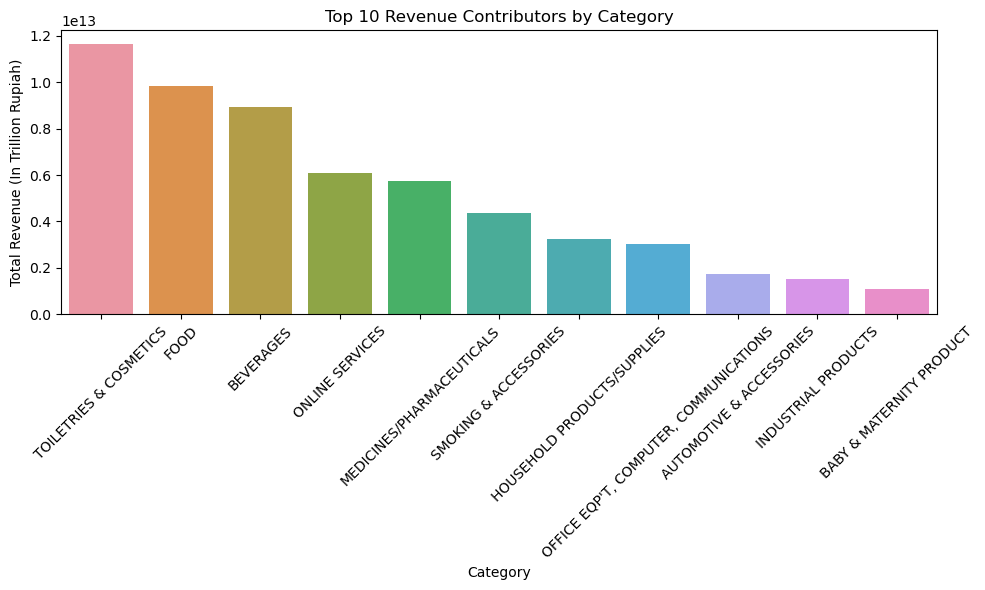

In [13]:
#1st Question
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_df.index, y=sorted_df['REVENUE'])
plt.xlabel('Category')
plt.ylabel('Total Revenue (In Trillion Rupiah)')
plt.title('Top 10 Revenue Contributors by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

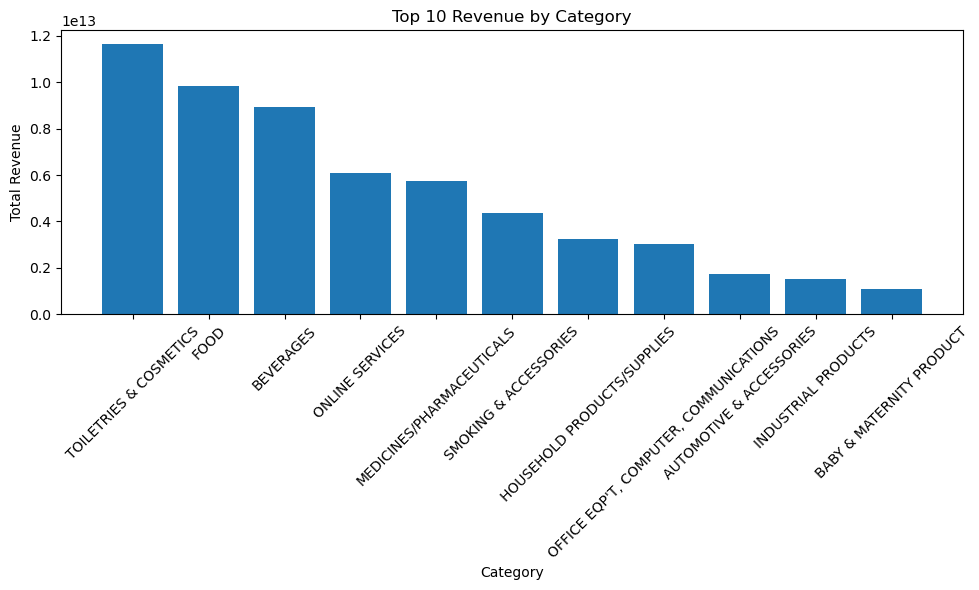

In [158]:
# Plot bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['REVENUE'])
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#2nd Question
column_name2 = 'TV CHANNEL'  # Replace with the column name
value_column = 'REVENUE'  # Replace with the column containing values to calculate the mean

# Read the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Group data by unique categories and calculate mean
grouped_data2 = data.groupby(column_name2)[value_column].mean()

print(grouped_data2)

TV CHANNEL
TV A   34,275,852,368
TV B   28,944,349,593
TV C   25,075,589,744
TV D   18,350,555,233
TV E   15,195,359,281
TV F   10,280,389,831
TV G    9,701,454,545
TV H    9,577,716,867
TV I    6,745,797,468
TV J    3,325,617,647
TV K    3,648,644,737
TV L    3,692,549,296
TV M      429,000,000
Name: REVENUE, dtype: float64


In [22]:
#2nd Question
grouped_datasum2 = data.groupby(column_name2)[value_column].sum()
grouped_datasum2

TV CHANNEL
TV A    12305031000000
TV B    10680465000000
TV C     8801532000000
TV D     6312591000000
TV E     5075250000000
TV F     3639258000000
TV G     3308196000000
TV H     3179802000000
TV I     1598754000000
TV J      678426000000
TV K      831891000000
TV L      786513000000
TV M       10296000000
Name: REVENUE, dtype: int64

In [21]:
# Convert the DataFrame to a tabulated format
tabulated_data2 = tabulate(grouped_datasum2, headers='keys', tablefmt='pretty')

# Print the tabulated data
print(tabulated_data2)

TypeError: 'numpy.int64' object is not iterable

In [19]:
#2nd Question
q2 = pd.DataFrame(grouped_datasum2)

sorted_df2 = q2.sort_values(by='REVENUE', ascending=False)

print(sorted_df2)

                   REVENUE
TV CHANNEL                
TV A        12305031000000
TV B        10680465000000
TV C         8801532000000
TV D         6312591000000
TV E         5075250000000
TV F         3639258000000
TV G         3308196000000
TV H         3179802000000
TV I         1598754000000
TV K          831891000000
TV L          786513000000
TV J          678426000000
TV M           10296000000


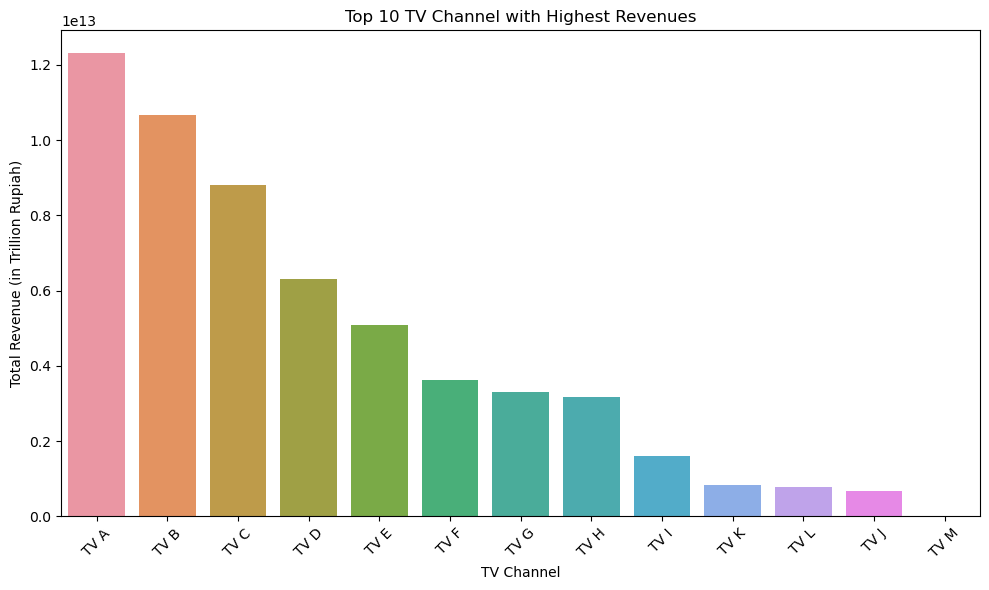

In [20]:
#2rd Question
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_df2.index, y=sorted_df2['REVENUE'])
plt.xlabel('TV Channel')
plt.ylabel('Total Revenue (in Trillion Rupiah)')
plt.title('Top 10 TV Channel with Highest Revenues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
#3rd Question
#3. Compare the advertiser composition each year (In terms of spending % and also top advertisers) 
df['ADVERTISER'].nunique()

93

In [79]:
#3rd Question
#3. Compare the advertiser composition each year (In terms of spending % and also top advertisers) 
thirdquestion = df.groupby('ADVERTISER')['REVENUE'].mean()
thirdquestion

ADVERTISER
ABC GROUP                       12,812,379,310
ADHI CAKRA UTAMA MULIA, PT       2,429,166,667
AJINOMOTO INDONESIA PT          10,561,875,000
ASIAN PAINT INDONESIA, PT        3,942,000,000
ASTRA DAIHATSU MOTOR             4,108,588,235
                                     ...      
WINGS GROUP                     17,977,281,818
WULING MOTORS                    8,111,777,778
XL AXIATA PT                     8,599,466,667
YAMAHA INDONESIA MOTOR MFG,PT    6,083,785,714
ZILLION TECH INDONESIA, PT      12,587,454,545
Name: REVENUE, Length: 93, dtype: float64

In [96]:
#3rd Question
#3. Compare the advertiser composition each year (In terms of spending % and also top advertisers)
thirdq_df = pd.read_excel('Task Python.xlsx', sheet_name='Sheet1')

thirdq_df.groupby(['YEAR','ADVERTISER', 'TV CHANNEL']).mean().sort_values(by='YEAR', ascending=True)


C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_16156\630785012.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  thirdq_df.groupby(['YEAR','ADVERTISER', 'TV CHANNEL']).mean().sort_values(by='YEAR', ascending=True)


REVENUE
YEAR ADVERTISER                      TV CHANNEL               
2018 ABC GROUP                       TV A       15,462,000,000
     SAMSUNG ELECTRONIC              TV B       16,677,000,000
                                     TV C       23,328,000,000
                                     TV D        9,252,000,000
                                     TV E       15,489,000,000
...                                                        ...
2021 INDONESIA OPPO ELECTRONICS, PT. TV D        5,208,000,000
                                     TV E        4,782,000,000
                                     TV F          564,000,000
                                     TV H        2,730,000,000
     YAMAHA INDONESIA MOTOR MFG,PT   TV K          315,000,000

[3104 rows x 1 columns]

In [98]:
#3rd Question
#3. Compare the advertiser composition each year (In terms of spending % and also top advertisers)

# Group by ['YEAR', 'ADVERTISER', 'TV CHANNEL'] and calculate the mean revenue
grouped3_df = thirdq_df.groupby(['YEAR', 'ADVERTISER', 'TV CHANNEL']).mean().reset_index()

# Sort the DataFrame by 'YEAR' and 'REVENUE' in ascending order
sorted3_df = grouped3_df.sort_values(by=['YEAR', 'REVENUE'], ascending=[True, False])

# Define a function to get the top 5 highest revenue entries for each year
def get_top_5(group):
    return group.head(5)

# Apply the function to each year's group
 = sorted3_df.groupby('YEAR', group_keys=False).apply(get_top_5)

      YEAR                          ADVERTISER TV CHANNEL         REVENUE
69    2018                       BUKALAPAK, PT       TV C 239,025,000,000
370   2018                  MAYORA INDAH GROUP       TV A 126,957,000,000
130   2018                   EGLIN FARMA GROUP       TV D  99,792,000,000
700   2018                            UNILEVER       TV A  97,011,750,000
67    2018                       BUKALAPAK, PT       TV A  96,762,000,000
907   2019           ECART WEBPORTAL INDONESIA       TV A 177,963,000,000
895   2019                        DJARUM KUDUS       TV A 145,797,000,000
896   2019                        DJARUM KUDUS       TV B 141,516,000,000
1388  2019  SHOPEE INTERNATIONAL INDONESIA, PT       TV C 137,979,000,000
1182  2019                  MAYORA INDAH GROUP       TV A 102,102,000,000
2170  2020  SHOPEE INTERNATIONAL INDONESIA, PT       TV C 123,123,000,000
1973  2020                  MAYORA INDAH GROUP       TV A 117,447,000,000
1726  2020           ECART WEBPORTAL I

C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_16156\4222636212.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped3_df = thirdq_df.groupby(['YEAR', 'ADVERTISER', 'TV CHANNEL']).mean().reset_index()


In [112]:
# Define a function to get the top 10 highest revenue entries for each year
def get_top_10(group):
    return group.head(10)

# Apply the function to each year's group
top_10_df = sorted3_df.groupby('YEAR', group_keys=False).apply(get_top_10)

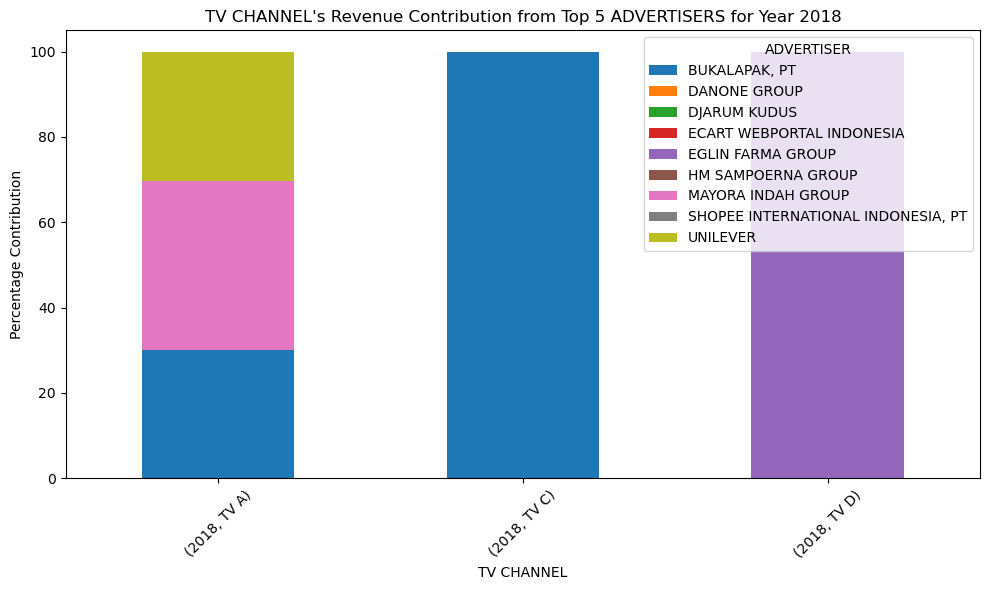

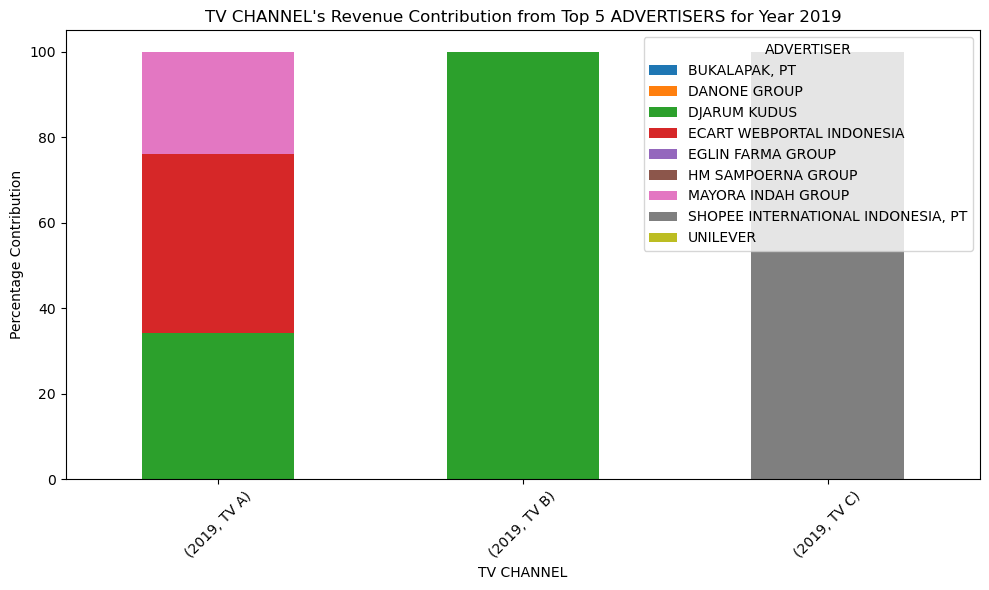

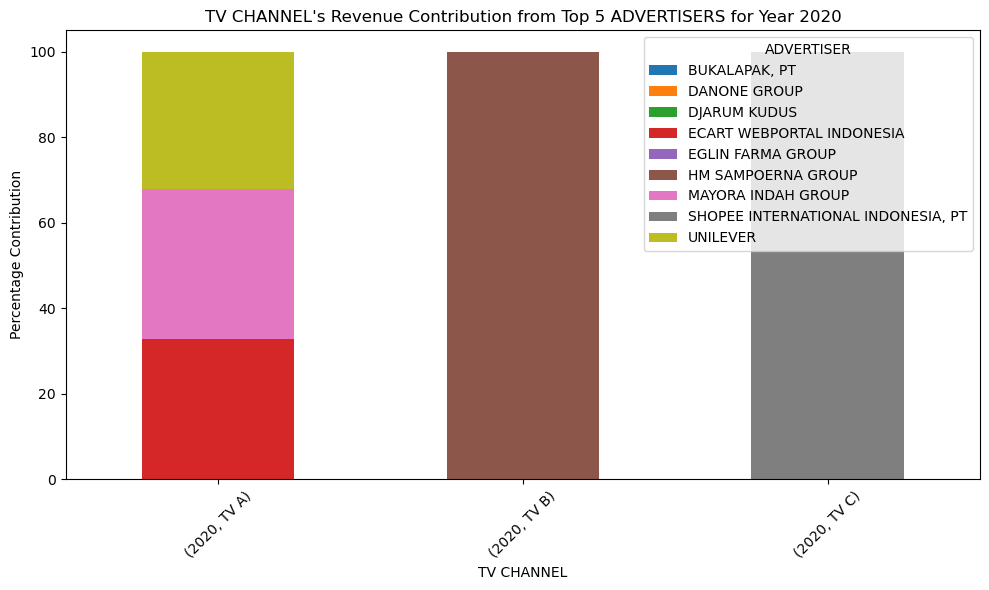

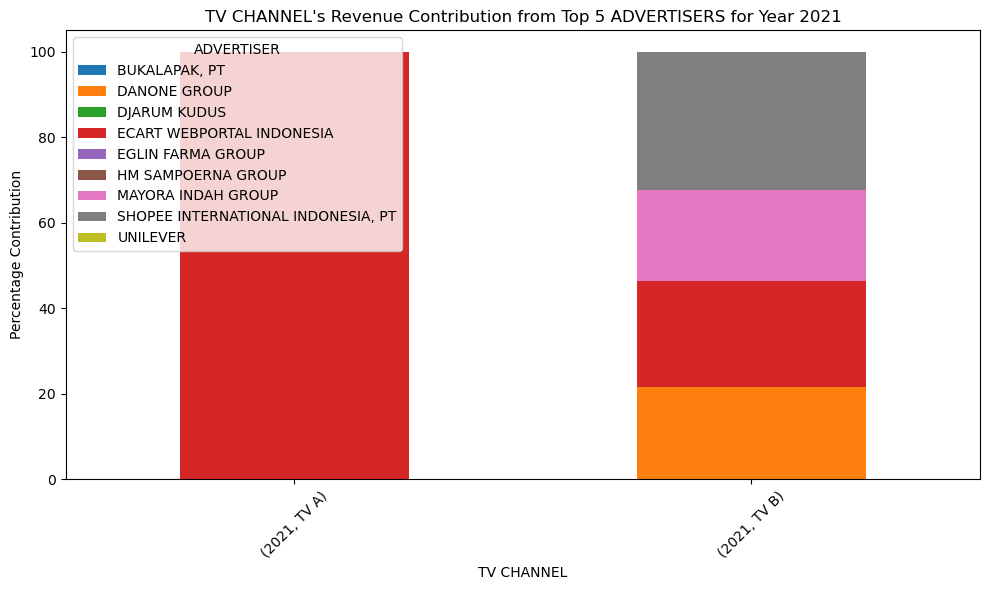

In [105]:
# Group the  DataFrame by 'YEAR', 'TV CHANNEL', and calculate total revenue for each channel
year_channel_revenue = .groupby(['YEAR', 'TV CHANNEL'])['REVENUE'].sum()

# Calculate the percentage contribution of each advertiser's revenue to the total revenue of each channel
percentage_contributions = .groupby(['YEAR', 'TV CHANNEL', 'ADVERTISER'])['REVENUE'].sum() / year_channel_revenue
percentage_contributions *= 100  # Convert to percentage

# Pivot the data to create a DataFrame with TV CHANNELs as columns and ADVERTISERs as index
pivot_df = percentage_contributions.unstack(level='ADVERTISER')

# Plot the distribution for each year
for year, year_group in pivot_df.groupby('YEAR'):
    plt.figure(figsize=(10, 6))
    year_group.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"TV CHANNEL's Revenue Contribution from Top 5 ADVERTISERS for Year {year}")
    plt.xlabel('TV CHANNEL')
    plt.ylabel('Percentage Contribution')
    plt.legend(title='ADVERTISER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

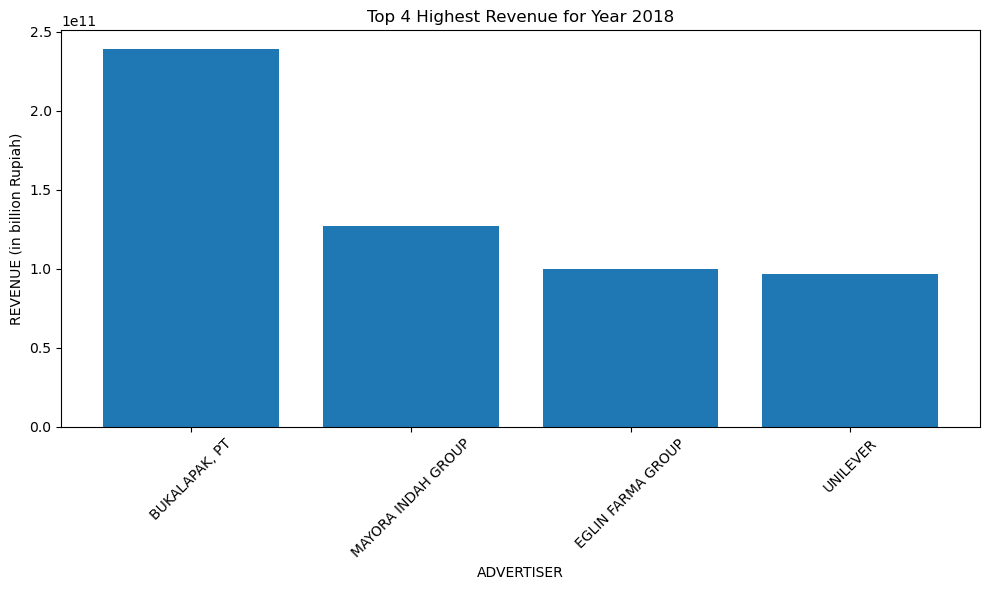

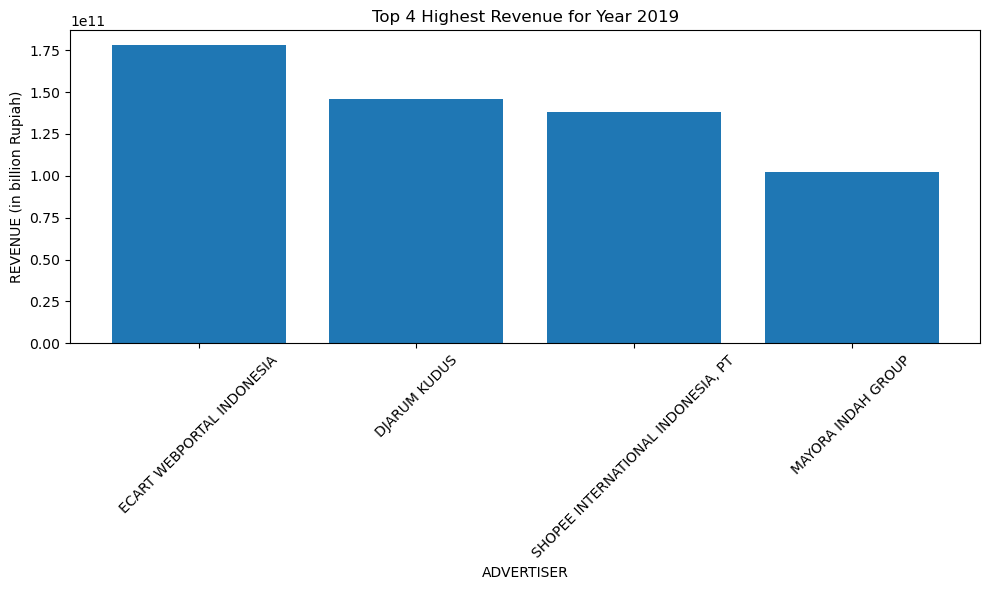

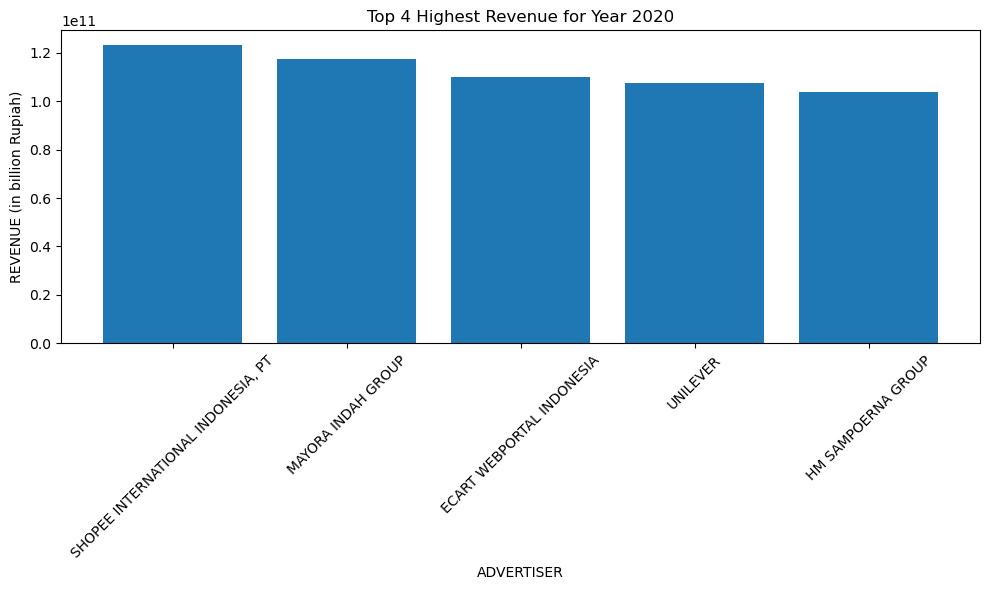

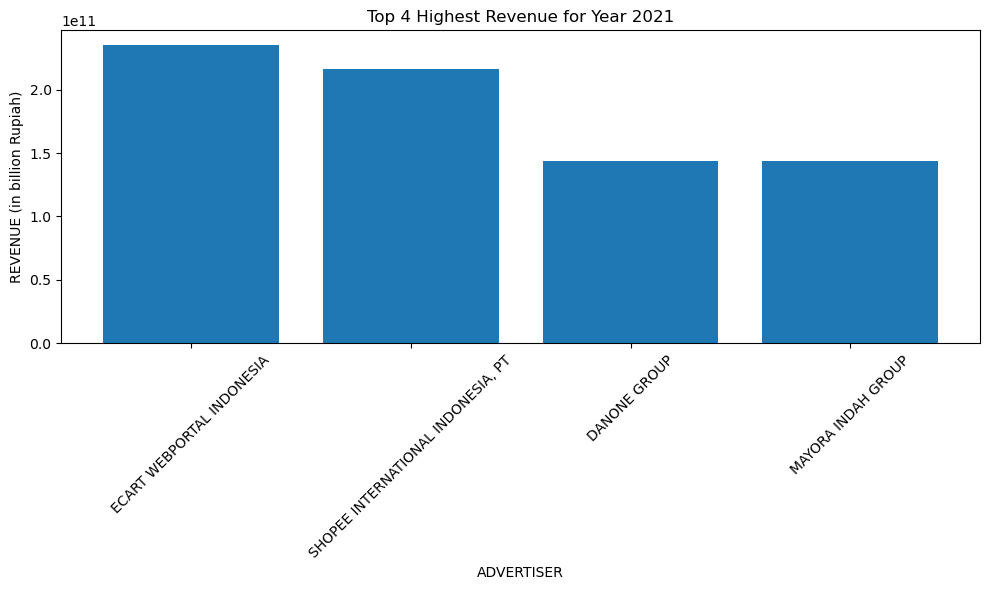

      YEAR                          ADVERTISER TV CHANNEL         REVENUE
69    2018                       BUKALAPAK, PT       TV C 239,025,000,000
370   2018                  MAYORA INDAH GROUP       TV A 126,957,000,000
130   2018                   EGLIN FARMA GROUP       TV D  99,792,000,000
700   2018                            UNILEVER       TV A  97,011,750,000
67    2018                       BUKALAPAK, PT       TV A  96,762,000,000
907   2019           ECART WEBPORTAL INDONESIA       TV A 177,963,000,000
895   2019                        DJARUM KUDUS       TV A 145,797,000,000
896   2019                        DJARUM KUDUS       TV B 141,516,000,000
1388  2019  SHOPEE INTERNATIONAL INDONESIA, PT       TV C 137,979,000,000
1182  2019                  MAYORA INDAH GROUP       TV A 102,102,000,000
2170  2020  SHOPEE INTERNATIONAL INDONESIA, PT       TV C 123,123,000,000
1973  2020                  MAYORA INDAH GROUP       TV A 117,447,000,000
1726  2020           ECART WEBPORTAL I

In [104]:
#3rd Question
#3. Compare the advertiser composition each year (In terms of spending % and also top advertisers)

# Plotting
for year, year_group in .groupby('YEAR'):
    plt.figure(figsize=(10, 6))
    plt.bar(year_group['ADVERTISER'], year_group['REVENUE'])
    plt.title(f'Top 4 Highest Revenue for Year {year}')
    plt.xlabel('ADVERTISER')
    plt.ylabel('REVENUE (in billion Rupiah)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
#In this example, we are using Matplotlib to create bar plots for each year's top 5 highest revenue entries. The loop iterates through each year's group in the  DataFrame, and for each year, it creates a bar plot with TV channels on the x-axis and revenue on the y-axis.

#You can further customize the plots according to your preferences by adjusting parameters like colors, labels, and more. Additionally, if you want more advanced visualization options, you might consider using libraries like Seaborn or Plotly, which offer more high-level functions and additional features for creating visually appealing plots.

print()

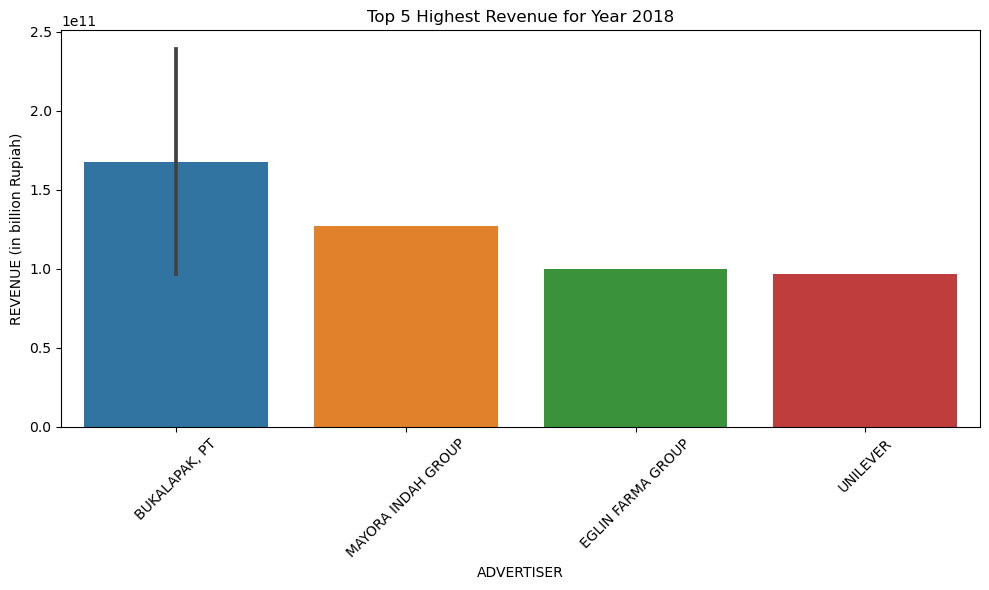

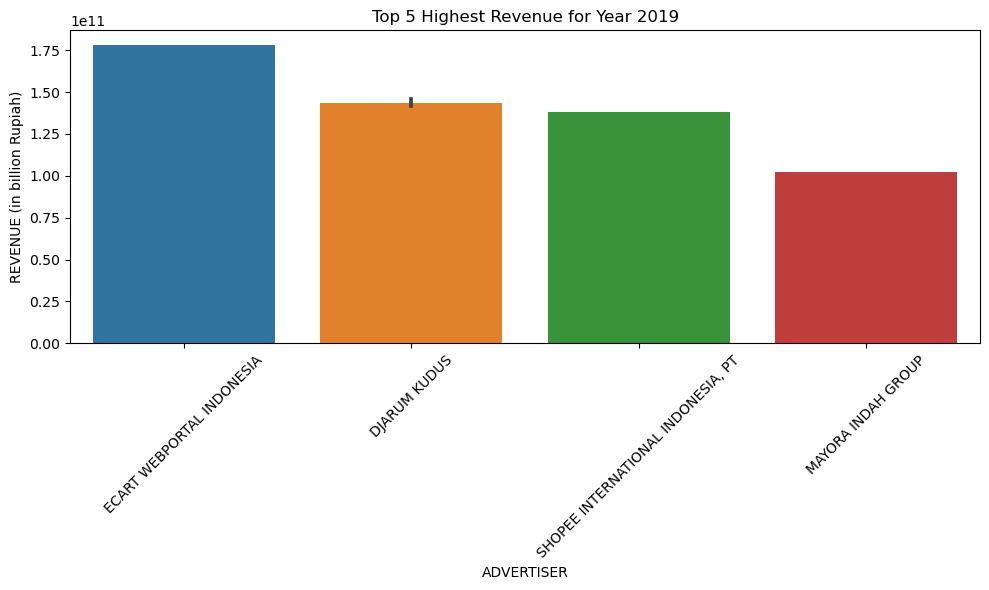

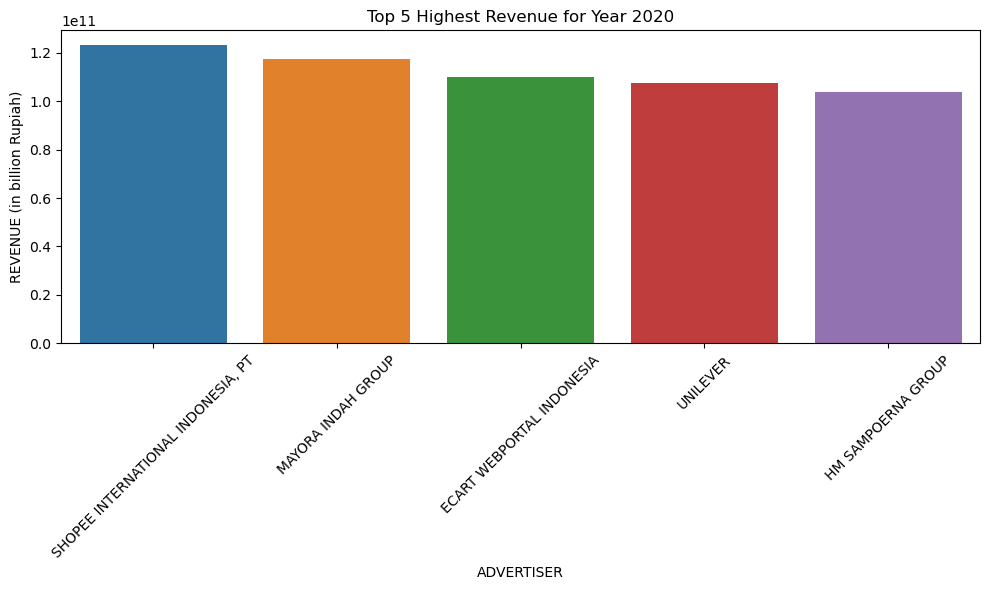

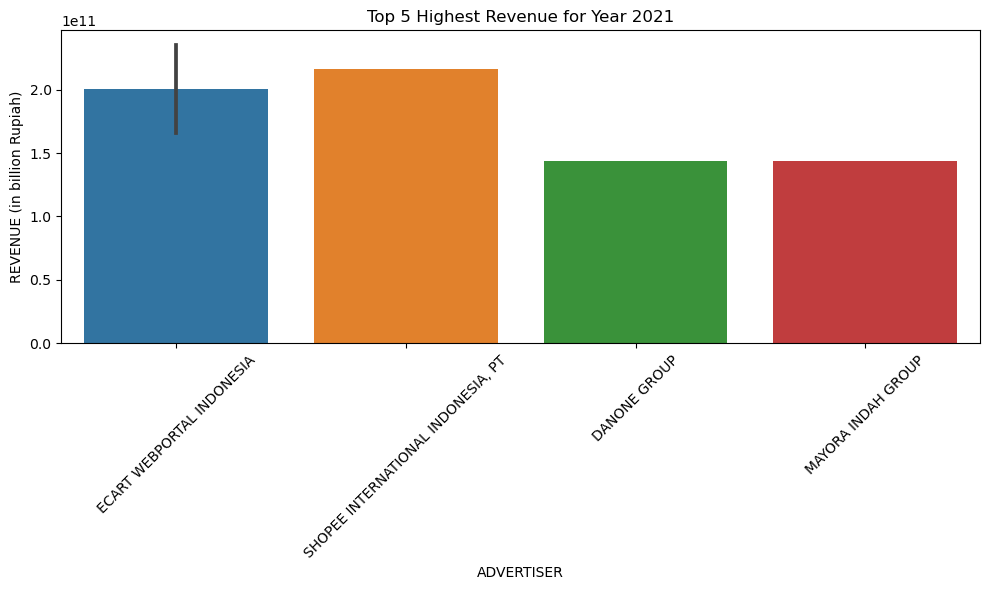

      YEAR                          ADVERTISER TV CHANNEL         REVENUE
69    2018                       BUKALAPAK, PT       TV C 239,025,000,000
370   2018                  MAYORA INDAH GROUP       TV A 126,957,000,000
130   2018                   EGLIN FARMA GROUP       TV D  99,792,000,000
700   2018                            UNILEVER       TV A  97,011,750,000
67    2018                       BUKALAPAK, PT       TV A  96,762,000,000
907   2019           ECART WEBPORTAL INDONESIA       TV A 177,963,000,000
895   2019                        DJARUM KUDUS       TV A 145,797,000,000
896   2019                        DJARUM KUDUS       TV B 141,516,000,000
1388  2019  SHOPEE INTERNATIONAL INDONESIA, PT       TV C 137,979,000,000
1182  2019                  MAYORA INDAH GROUP       TV A 102,102,000,000
2170  2020  SHOPEE INTERNATIONAL INDONESIA, PT       TV C 123,123,000,000
1973  2020                  MAYORA INDAH GROUP       TV A 117,447,000,000
1726  2020           ECART WEBPORTAL I

In [162]:
# Plotting
for year, year_group in .groupby('YEAR'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='ADVERTISER', y='REVENUE', data=year_group)
    plt.title(f'Top 5 Highest Revenue for Year {year}')
    plt.xlabel('ADVERTISER')
    plt.ylabel('REVENUE (in billion Rupiah)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Print the DataFrame
print()

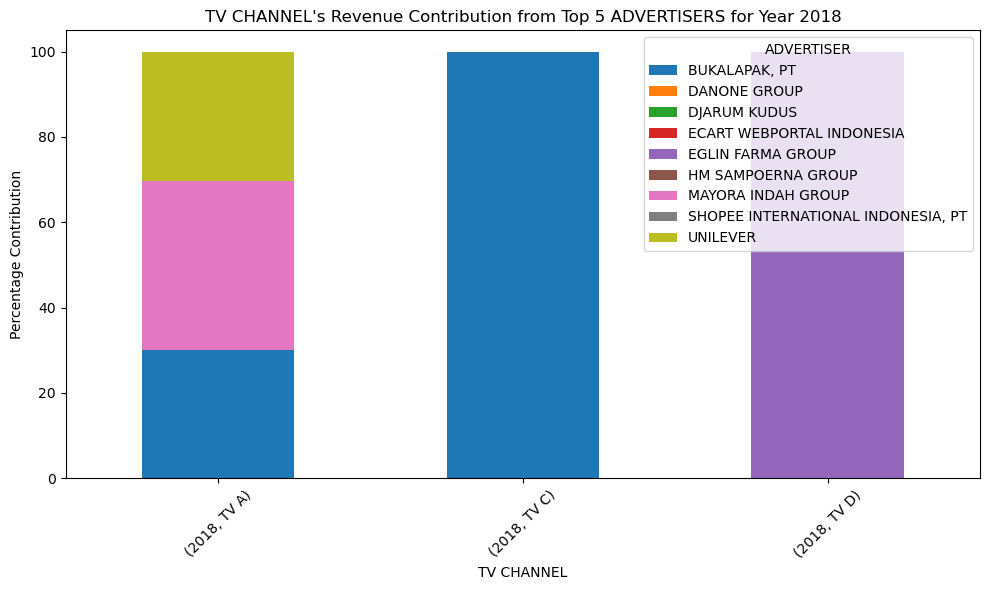

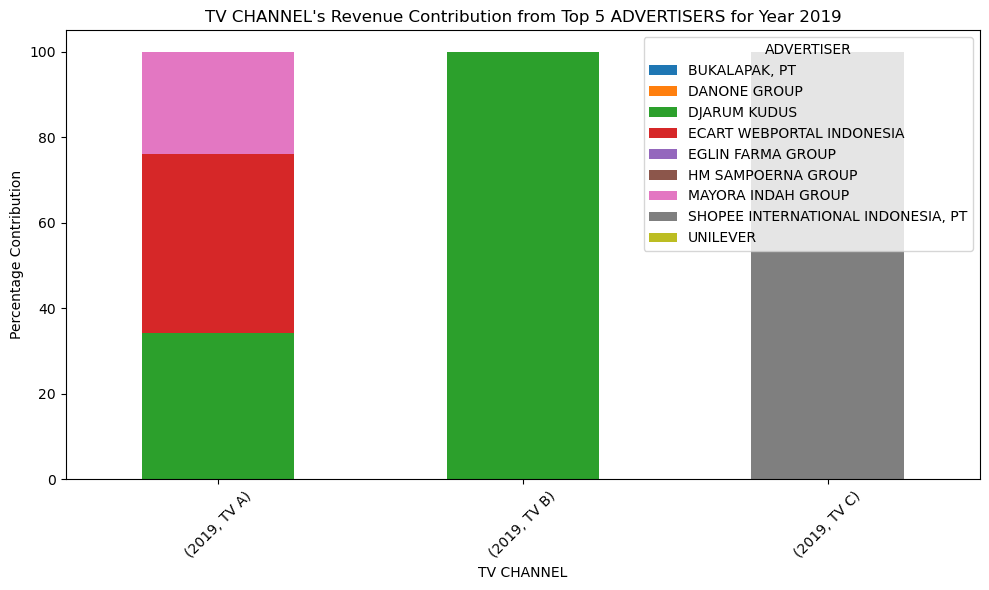

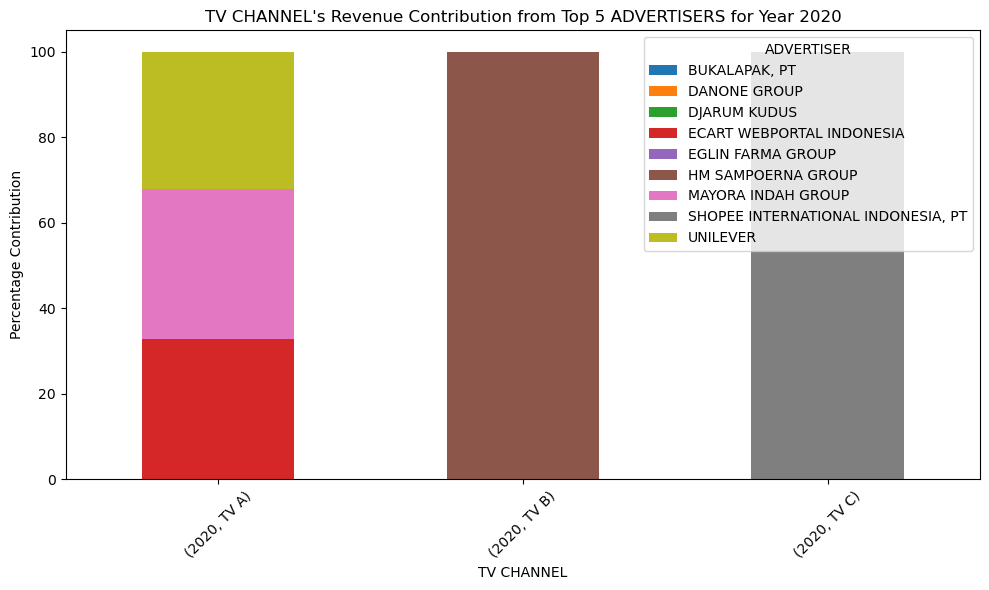

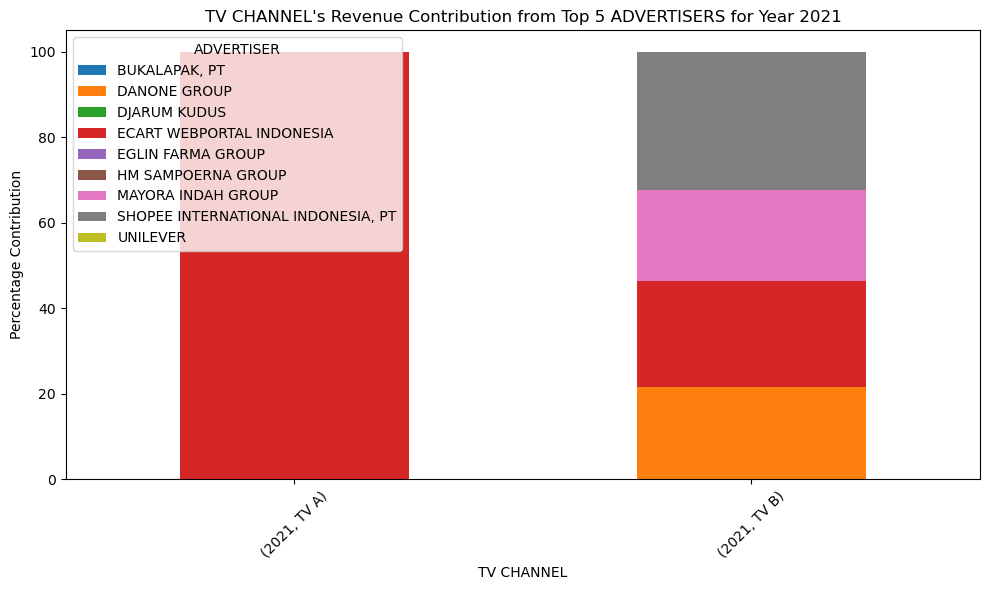

In [107]:
# Assume you have the '' DataFrame from your previous code

# Pivot the '' DataFrame to get a suitable format for plotting
pivot_df = .pivot(index=['YEAR', 'TV CHANNEL'], columns='ADVERTISER', values='REVENUE')

# Fill missing values with 0 (no revenue contribution)
pivot_df.fillna(0, inplace=True)

# Calculate the percentage contribution of each advertiser's revenue to the total revenue of each channel
percentage_contributions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the distribution for each year
for year, year_data in percentage_contributions.groupby(level='YEAR'):
    year_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f"TV CHANNEL's Revenue Contribution from Top 5 ADVERTISERS for Year {year}")
    plt.xlabel('TV CHANNEL')
    plt.ylabel('Percentage Contribution')
    plt.legend(title='ADVERTISER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


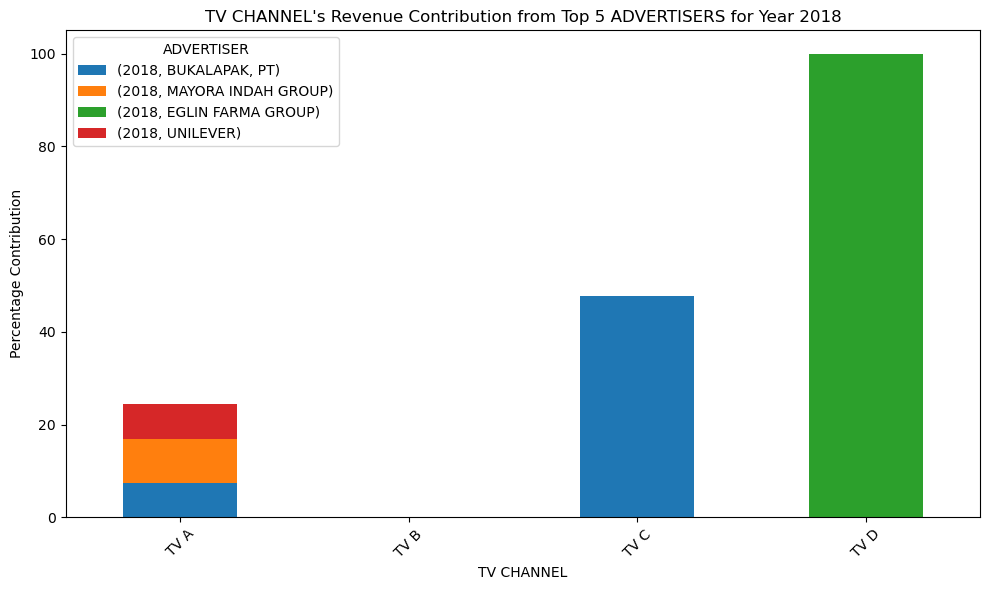

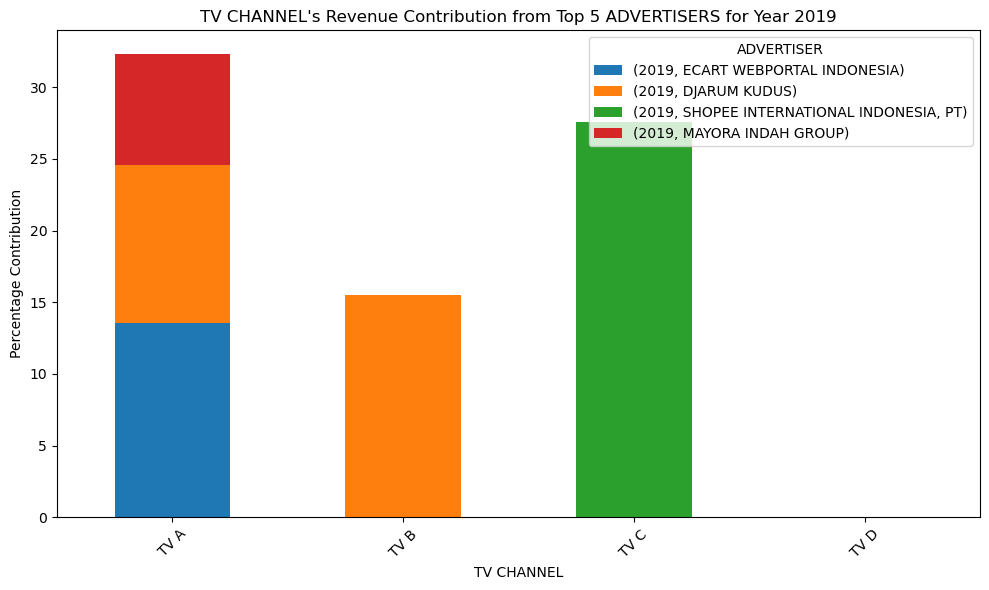

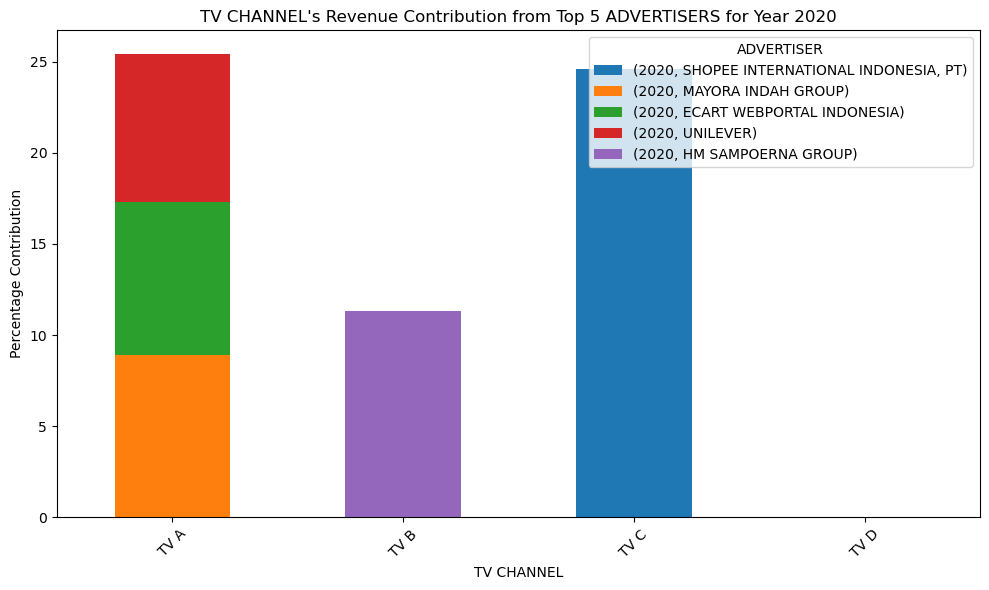

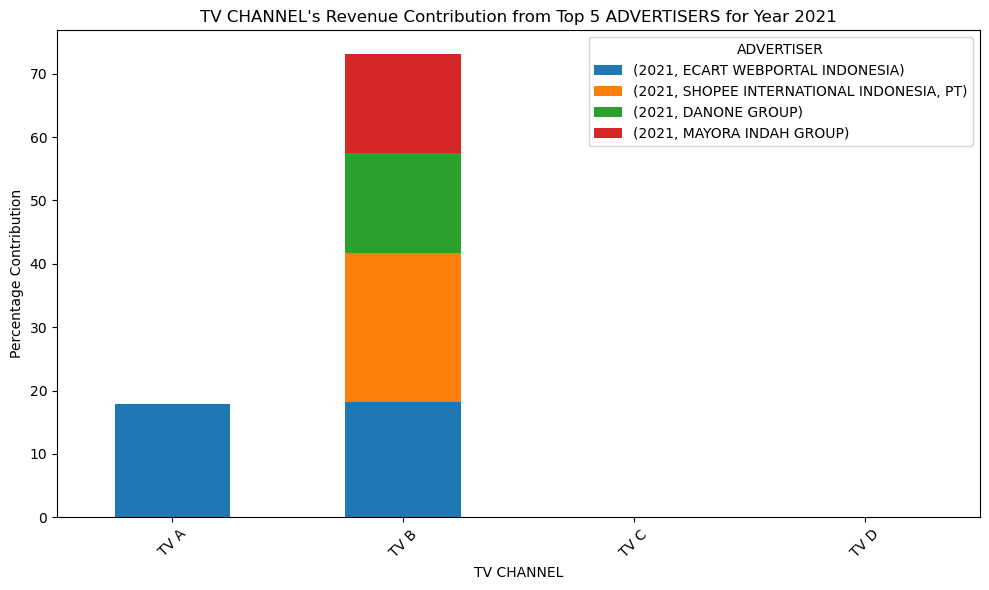

In [108]:
# Assume you have the '' DataFrame from your previous code

# Pivot the '' DataFrame to get a suitable format for plotting
pivot_df = .pivot(index='TV CHANNEL', columns=['YEAR', 'ADVERTISER'], values='REVENUE')

# Fill missing values with 0 (no revenue contribution)
pivot_df.fillna(0, inplace=True)

# Calculate the percentage contribution of each advertiser's revenue to the total revenue of each channel
percentage_contributions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the distribution for each year
for year, year_data in percentage_contributions.groupby(level='YEAR', axis=1):
    plt.figure(figsize=(10, 6))
    year_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"TV CHANNEL's Revenue Contribution from Top 5 ADVERTISERS for Year {year}")
    plt.xlabel('TV CHANNEL')
    plt.ylabel('Percentage Contribution')
    plt.legend(title='ADVERTISER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

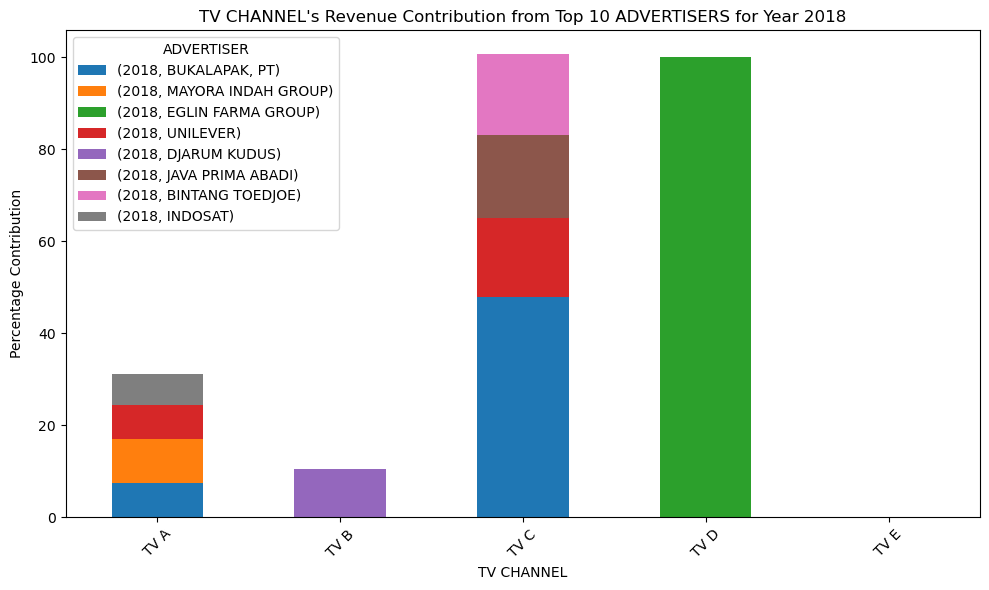

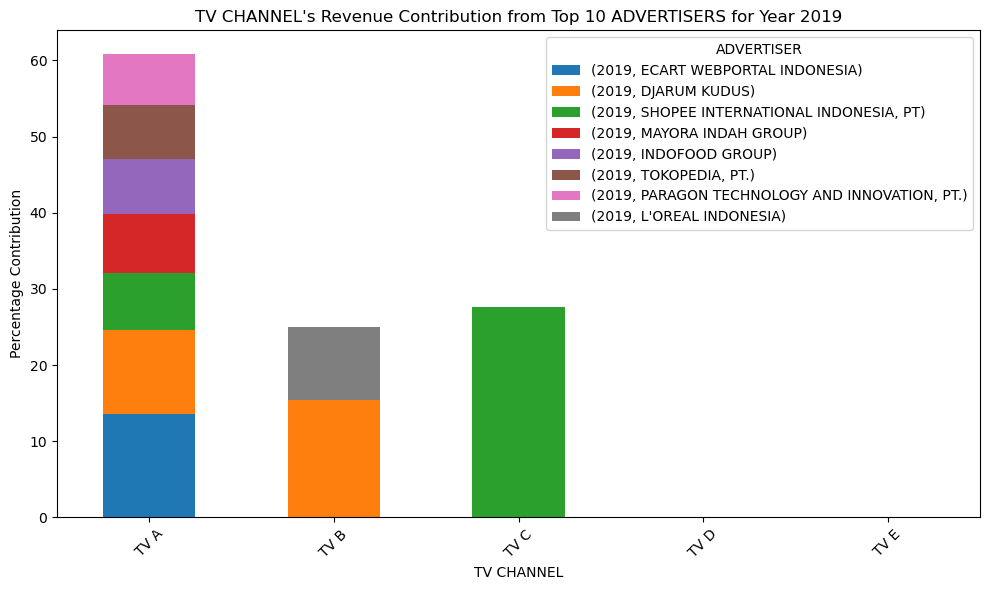

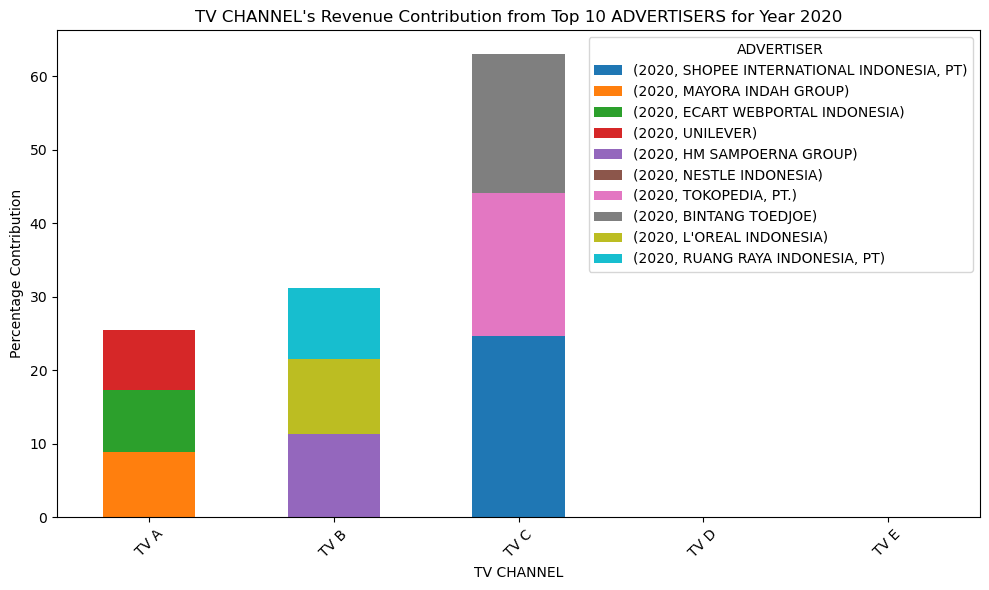

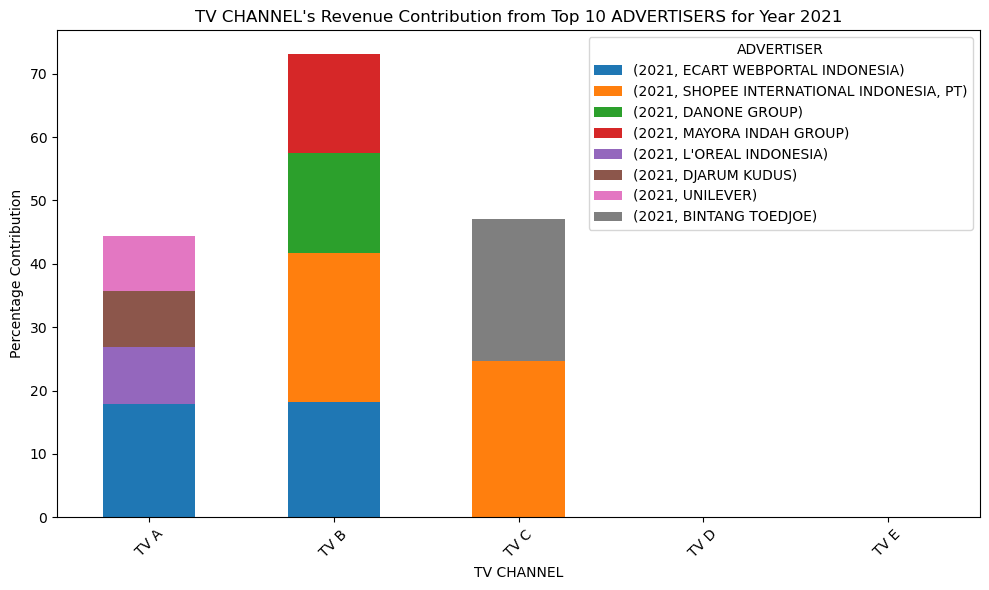

In [114]:
# Assume you have the 'top_10_df' DataFrame from your previous code

# Pivot the 'top_10_df' DataFrame to get a suitable format for plotting
pivot_df2 = top_10_df.pivot(index='TV CHANNEL', columns=['YEAR', 'ADVERTISER'], values='REVENUE')

# Fill missing values with 0 (no revenue contribution)
pivot_df2.fillna(0, inplace=True)

# Calculate the percentage contribution of each advertiser's revenue to the total revenue of each channel
percentage_contributions = pivot_df2.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the distribution for each year
for year, year_data in percentage_contributions.groupby(level='YEAR', axis=1):
    plt.figure(figsize=(10, 6))
    year_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"TV CHANNEL's Revenue Contribution from Top 10 ADVERTISERS for Year {year}")
    plt.xlabel('TV CHANNEL')
    plt.ylabel('Percentage Contribution')
    plt.legend(title='ADVERTISER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

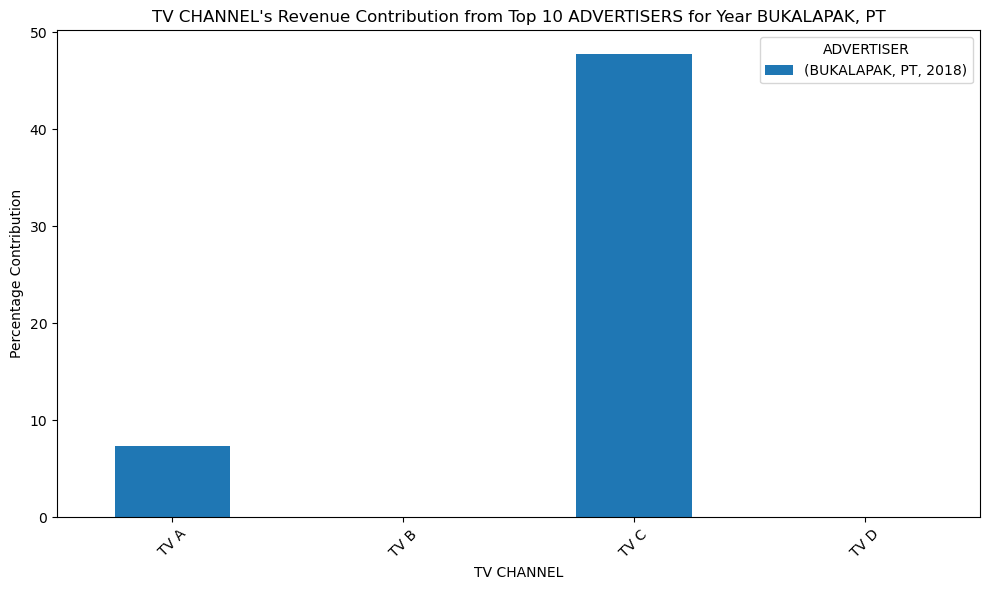

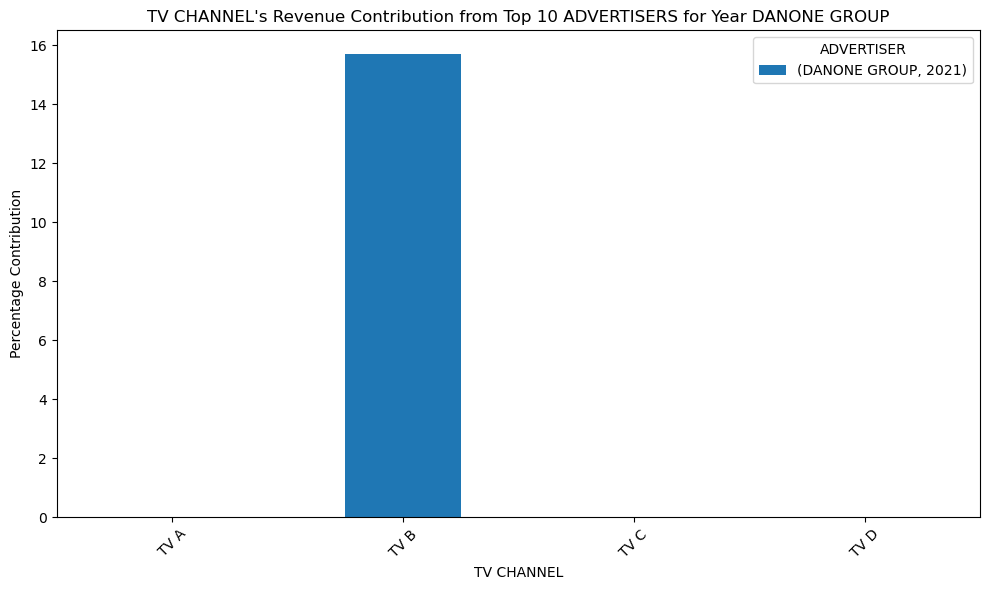

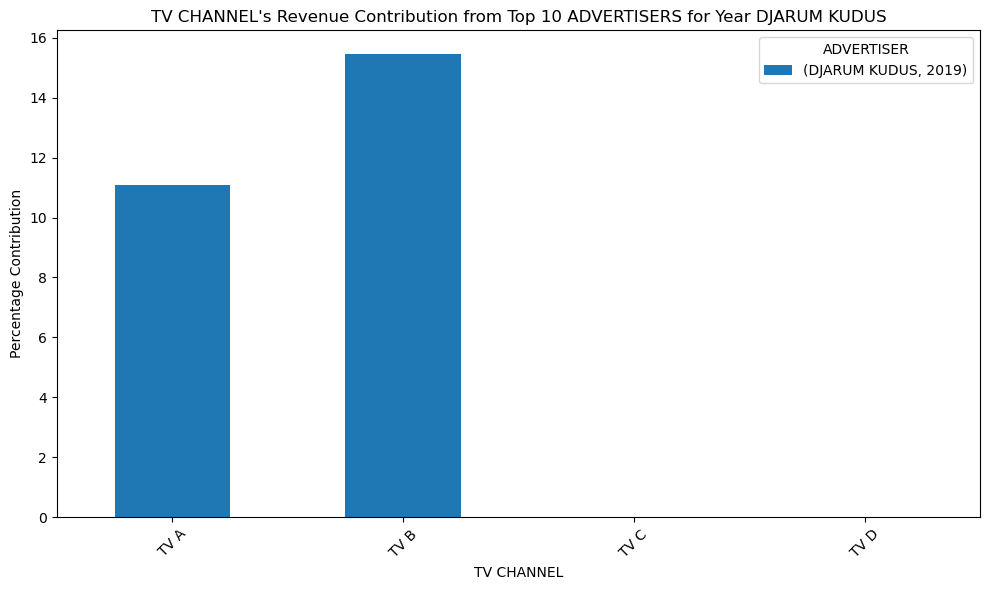

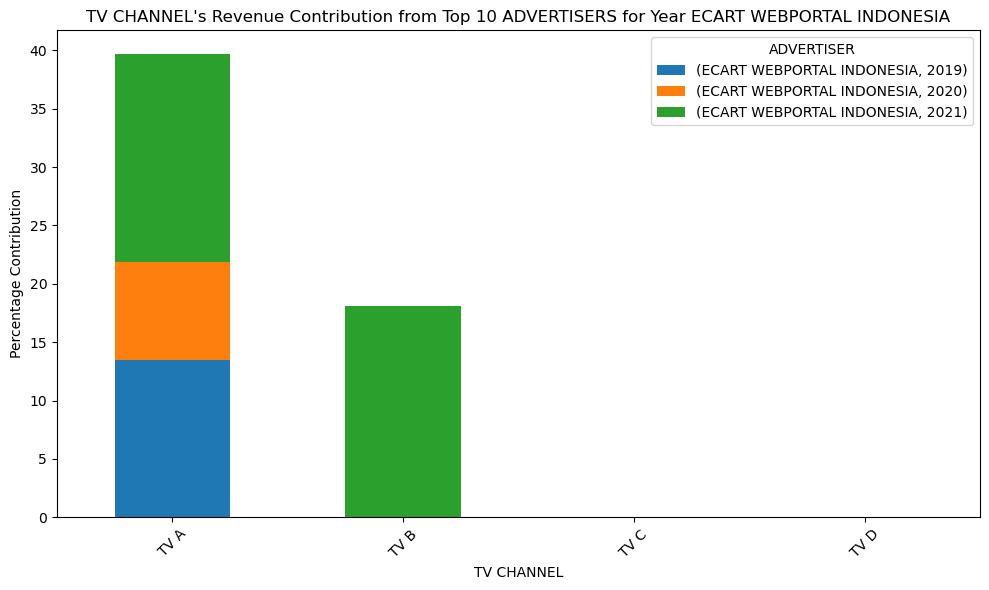

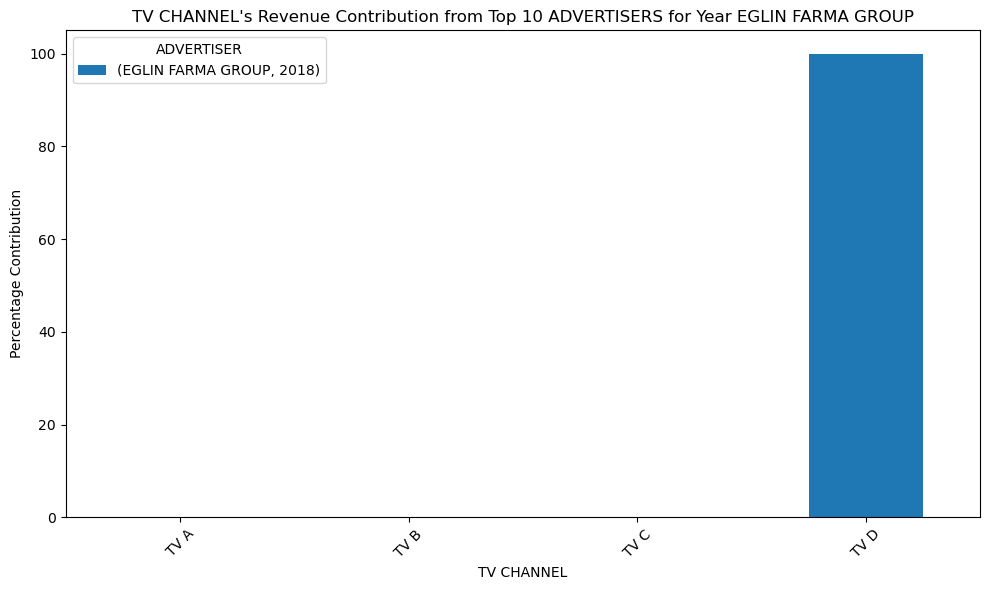

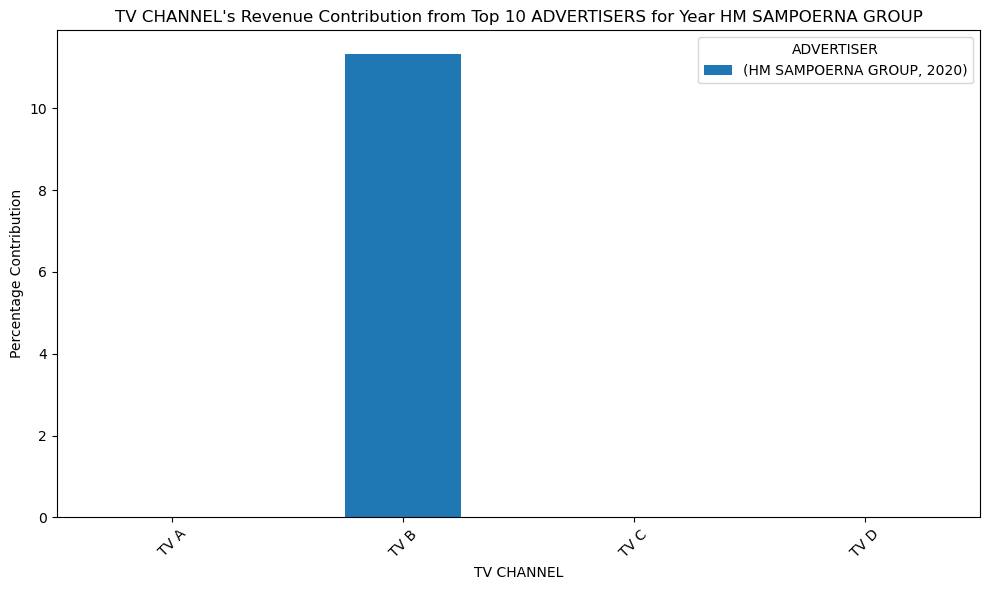

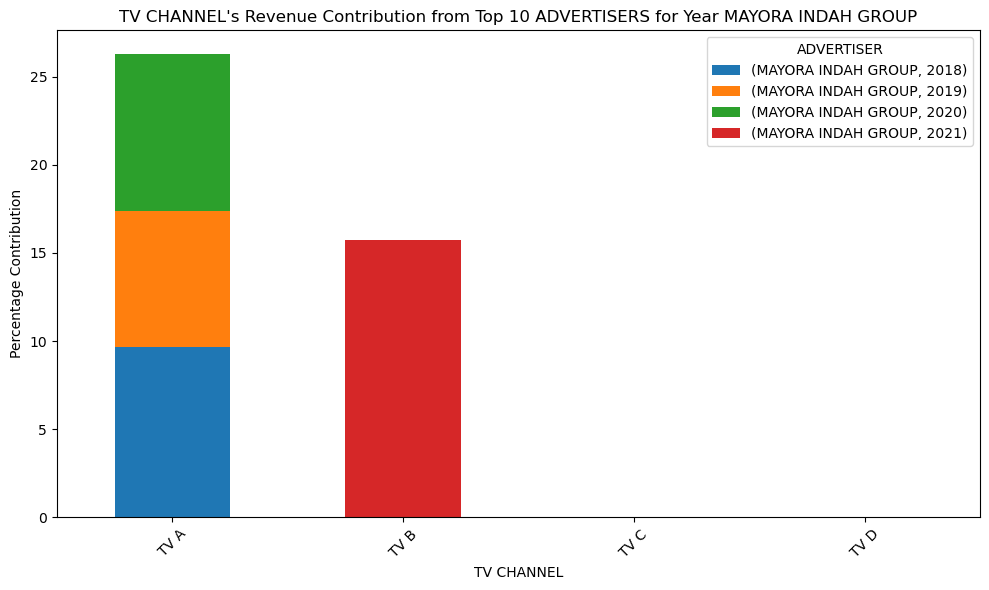

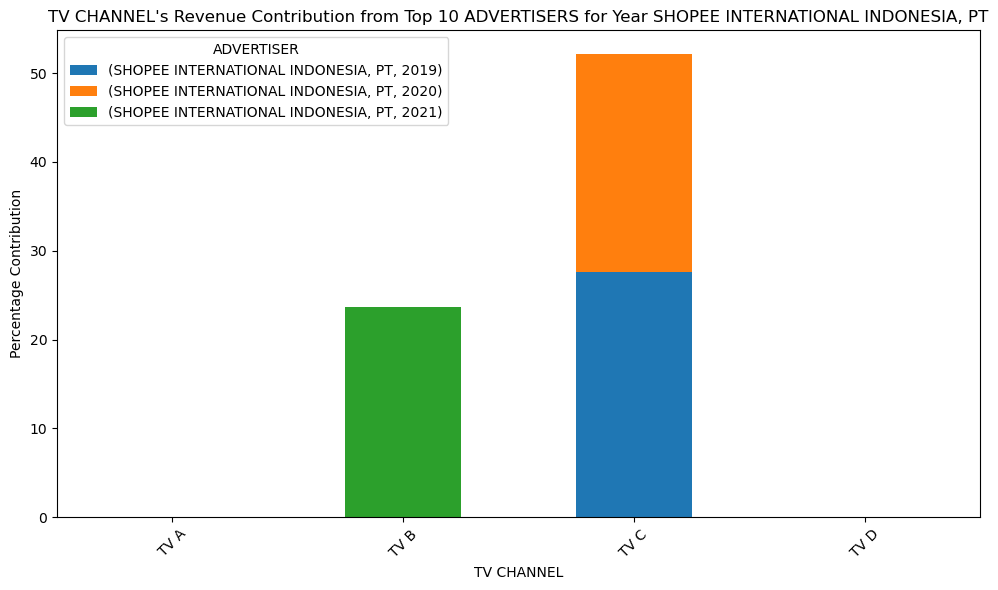

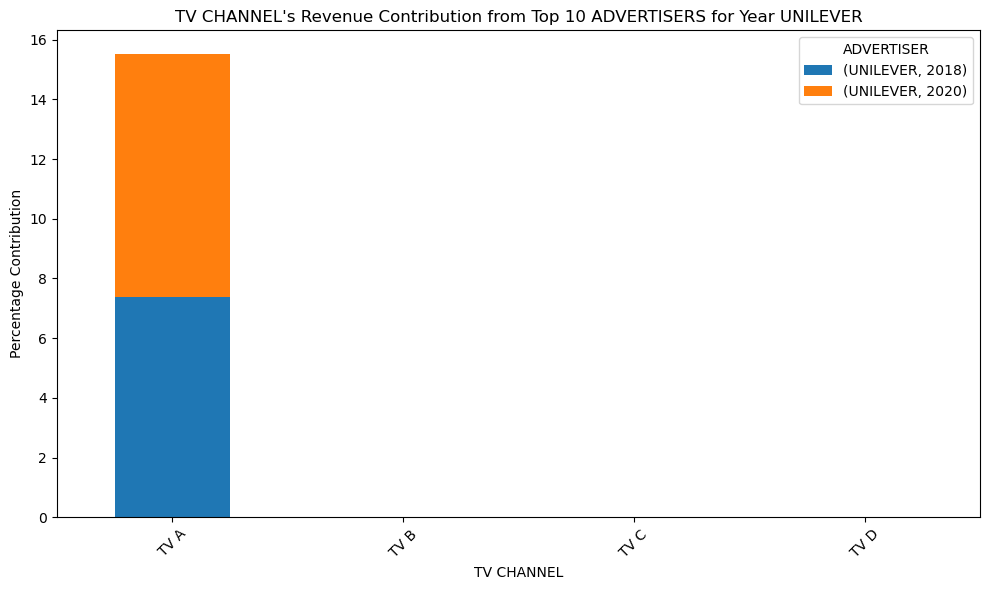

In [111]:
# Assume you have the '' DataFrame from your previous code

# Pivot the '' DataFrame to get a suitable format for plotting
pivot_df = .pivot(index='TV CHANNEL', columns=['ADVERTISER', 'YEAR'], values='REVENUE')

# Fill missing values with 0 (no revenue contribution)
pivot_df.fillna(0, inplace=True)

# Calculate the percentage contribution of each advertiser's revenue to the total revenue of each channel
percentage_contributions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Calculate the top N advertisers based on total contribution for each year
top_n = 10  # Change to the desired number of top advertisers
top_n_advertisers = .groupby(['YEAR', 'ADVERTISER'])['REVENUE'].sum().groupby('YEAR', group_keys=False).nlargest(top_n).reset_index()

# Filter the percentage_contributions DataFrame based on the top advertisers
filtered_contributions = percentage_contributions.loc[:, pd.IndexSlice[top_n_advertisers['ADVERTISER'], :]]

# Plot the distribution for each year
for year, year_data in filtered_contributions.groupby(level='ADVERTISER', axis=1):
    plt.figure(figsize=(10, 6))
    year_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"TV CHANNEL's Revenue Contribution from Top {top_n} ADVERTISERS for Year {year}")
    plt.xlabel('TV CHANNEL')
    plt.ylabel('Percentage Contribution')
    plt.legend(title='ADVERTISER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
#4th Question Analyze the links between channels and advertisrs, if any 

column_name = 'INDUSTRY SECTOR'  # Replace with the column name
value_column = 'REVENUE'  # Replace with the column containing values to calculate the mean

# Read the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Group data by unique categories and calculate mean
grouped_data = data.groupby(column_name)[value_column].mean()

print(grouped_data)

In [40]:
grouped = data.groupby(['TV CHANNEL','ADVERTISER']).sum().reset_index()

C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_16156\1936662755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = data.groupby(['TV CHANNEL','ADVERTISER']).sum().reset_index()


In [ ]:
import pandas as pd

# Replace 'path_to_excel_file.xlsx' with the actual path to your Excel file
excel_file_path = 'path_to_excel_file.xlsx'

# Replace 'Sheet1' with the sheet name containing your data
sheet_name3 = 'Sheet1'

# List of columns you want to select
columns_to_select3 = ['Column1', 'Column2', 'Column3']

# Read only the selected columns into a DataFrame
df = pd.read_excel('Task Python.xlsx', sheet_name=sheet1, usecols=['ADVERTISER','TV CHANNEL','REVENUE'])

# Print the DataFrame
print(df)


In [61]:
# Read only the selected columns into a DataFrame
fourthqdf = pd.read_excel('Task Python.xlsx', sheet_name='Sheet1', usecols=['ADVERTISER','TV CHANNEL','REVENUE'])

# Print the DataFrame
print(fourthqdf)

     TV CHANNEL                          ADVERTISER       REVENUE
0          TV A                           ABC GROUP   15462000000
1          TV A              AJINOMOTO INDONESIA PT   10509000000
2          TV A                   GARUDA FOOD GROUP   39543000000
3          TV A                      INDOFOOD GROUP  128604000000
4          TV A                               JAPFA    3315000000
...         ...                                 ...           ...
3685       TV L            RUANG RAYA INDONESIA, PT    6855000000
3686       TV L  SHOPEE INTERNATIONAL INDONESIA, PT    6972000000
3687       TV L                      TOKOPEDIA, PT.    7386000000
3688       TV M                    JAVA PRIMA ABADI      51000000
3689       TV M                           PERTAMINA      33000000

[3690 rows x 3 columns]


In [62]:
fourthqdf.groupby(['ADVERTISER', 'TV CHANNEL']).sum().reset_index()

,ADVERTISER,TV CHANNEL,REVENUE
0,ABC GROUP,TV A,27603000000
1,ABC GROUP,TV B,67197000000
2,ABC GROUP,TV C,79284000000
3,ABC GROUP,TV D,19317000000
4,ABC GROUP,TV E,68370000000
...,...,...,...
989,"ZILLION TECH INDONESIA, PT",TV H,12348000000
990,"ZILLION TECH INDONESIA, PT",TV I,3126000000
991,"ZILLION TECH INDONESIA, PT",TV J,13509000000
992,"ZILLION TECH INDONESIA, PT",TV K,24090000000


In [65]:
mean_fourthqdf = fourthqdf.groupby(['ADVERTISER', 'TV CHANNEL']).mean().reset_index()
sorted_fourthqdf = mean_thirdqdf.sort_values(by='REVENUE', ascending=False)
sorted_fourthqdf

,ADVERTISER,TV CHANNEL,REVENUE
154,ECART WEBPORTAL INDONESIA,TV A,"132,317,250,000"
141,DJARUM KUDUS,TV A,"99,864,000,000"
492,MAYORA INDAH GROUP,TV B,"98,507,000,000"
491,MAYORA INDAH GROUP,TV A,"98,247,333,333"
900,UNILEVER,TV A,"97,750,500,000"
...,...,...,...
9,ABC GROUP,TV J,"6,000,000"
216,"GELORA DJAJA, PT.",TV M,"6,000,000"
709,SASA INTI,TV M,"3,000,000"
648,RECKIT & BENCKISER,TV G,"3,000,000"


In [180]:
print(X_dummies.shape)

(3690, 92)


In [181]:
print(M_dummies.shape)

(3690, 12)


In [5]:
#4th Question Analyze the links between channels and advertisrs, if any 

import statsmodels.api as sm

# Assuming you have categorical variables X, M, and Y
X = df['ADVERTISER']
M = df['TV CHANNEL']
Y = df['REVENUE']

# Create dummy variables for categorical variables
X_dummies = pd.get_dummies(X, drop_first=True)
M_dummies = pd.get_dummies(M, drop_first=True)

# Fit linear regression to predict mediator M from independent variable X
model_X_M = sm.OLS(M_dummies.iloc[:, 0], X_dummies).fit()  # Select one column of M_dummies as the mediator
effect_X_M = model_X_M.params

# Fit linear regression to predict dependent variable Y from both X and M
X_M_combined = pd.concat([X_dummies, M_dummies], axis=1)
model_Y_XM = sm.OLS(Y, X_M_combined).fit()
effect_Y_XM = model_Y_XM.params

# Print the model summary to see the parameter names
print(model_Y_XM.summary())

# Identify the parameter names for the independent variable and mediator in the summary

# Calculate direct and indirect effects using the actual parameter names
direct_effect = effect_Y_XM['ADVERTISER']
total_effect = effect_Y_XM['ADVERTISER'] + effect_Y_XM['TV CHANNEL']
indirect_effect = total_effect - direct_effect

# Print results
print("Direct Effect:", direct_effect)
print("Indirect Effect:", indirect_effect)


                                 OLS Regression Results                                
Dep. Variable:                REVENUE   R-squared (uncentered):             1392579.757
Model:                            OLS   Adj. R-squared (uncentered):        1432966.871
Method:                 Least Squares   F-statistic:                             -34.48
Date:                Mon, 21 Aug 2023   Prob (F-statistic):                        1.00
Time:                        10:58:18   Log-Likelihood:                         -93030.
No. Observations:                3690   AIC:                                  1.863e+05
Df Residuals:                    3586   BIC:                                  1.869e+05
Df Model:                         104                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

KeyError: 'ADVERTISER'

In [19]:
#4th Question Analyze the links between channels and advertisrs, if any 

# Set the display format to show all digits of floating-point numbers
pd.options.display.float_format = '{:.15f}'.format

# Create a DataFrame with advertiser, TV channel, and their coefficients
coefficients_df = pd.DataFrame({
    'Variable': model_Y_XM.params.index,
    'Coefficient': model_Y_XM.params.values
})

# Sort the DataFrame by the absolute value of coefficients in descending order
sorted_df = coefficients_df.iloc[coefficients_df['Coefficient'].abs().argsort()[::-1]]
top_15_sorteddf = sorted_df.head(15)
print(top_15_sorteddf)

                                  Variable                 Coefficient
45                       L'OREAL INDONESIA 59028849259.710548400878906
84                                UNILEVER 58496541597.133117675781250
46                      MAYORA INDAH GROUP 56447151135.227226257324219
13                            DJARUM KUDUS 50521461179.127403259277344
11                            DANONE GROUP 47943790280.177314758300781
26                      HM SAMPOERNA GROUP 45423410476.123558044433594
49                        NESTLE INDONESIA 45274493723.796173095703125
54  PARAGON TECHNOLOGY AND INNOVATION, PT. 45216134188.505767822265625
29                          INDOFOOD GROUP 44798375947.106262207031250
68      SHOPEE INTERNATIONAL INDONESIA, PT 44458710393.490142822265625
14               ECART WEBPORTAL INDONESIA 44412487620.147773742675781
24                            GUDANG GARAM 43996310494.432586669921875
82                         ULTRA SAKTI, PT 42135985436.075187683105469
58    

In [20]:
# Display the result as a formatted table
table = tabulate(top_15_sorteddf, headers='keys', tablefmt='grid', showindex=False)
print(table)

+----------------------------------------+---------------+
| Variable                               |   Coefficient |
+========================================+===============+
| L'OREAL INDONESIA                      |   5.90288e+10 |
+----------------------------------------+---------------+
| UNILEVER                               |   5.84965e+10 |
+----------------------------------------+---------------+
| MAYORA INDAH GROUP                     |   5.64472e+10 |
+----------------------------------------+---------------+
| DJARUM KUDUS                           |   5.05215e+10 |
+----------------------------------------+---------------+
| DANONE GROUP                           |   4.79438e+10 |
+----------------------------------------+---------------+
| HM SAMPOERNA GROUP                     |   4.54234e+10 |
+----------------------------------------+---------------+
| NESTLE INDONESIA                       |   4.52745e+10 |
+----------------------------------------+--------------

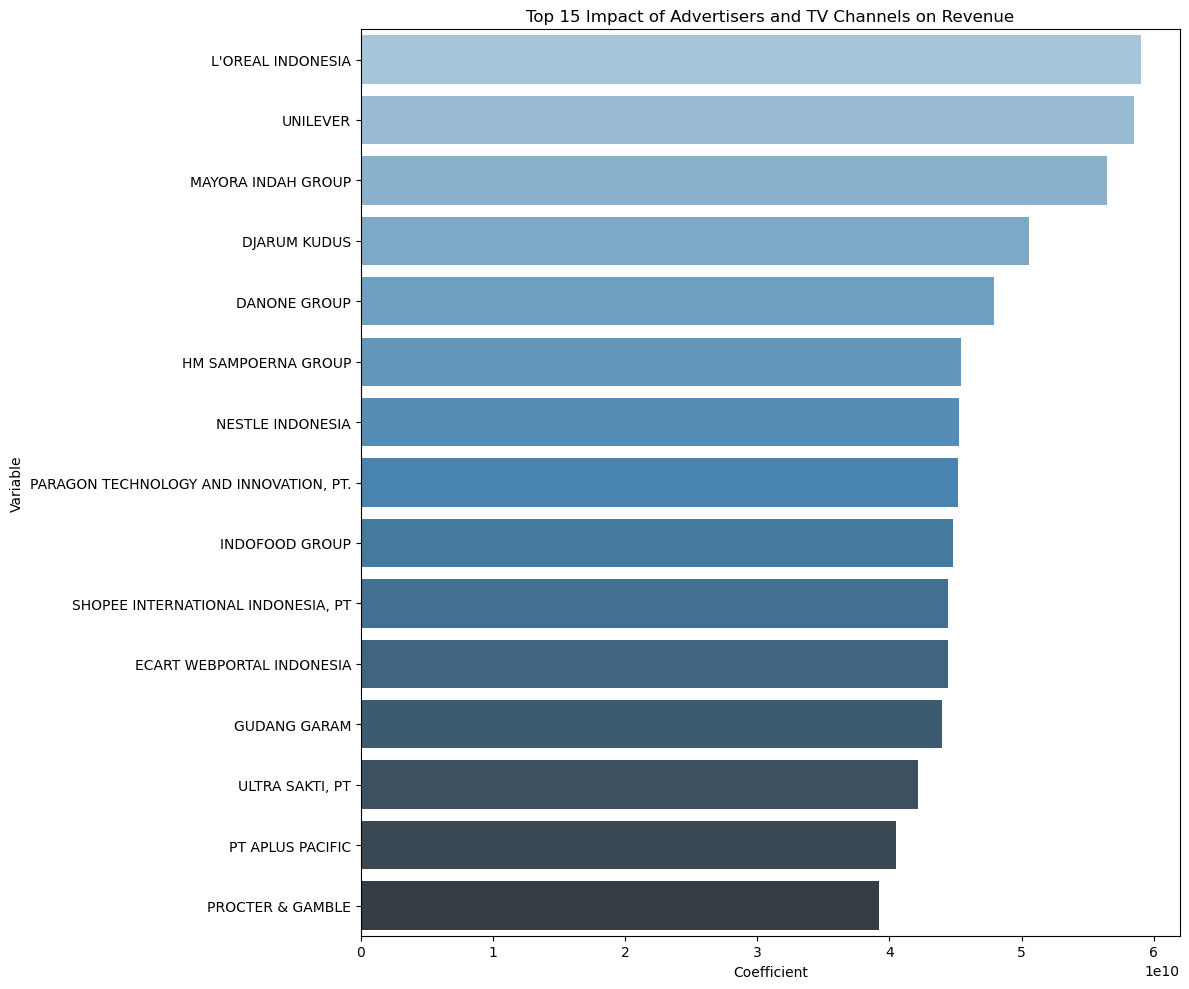

In [13]:
# Create a DataFrame with advertiser, TV channel, and their coefficients
coefficients_df = pd.DataFrame({
    'Variable': model_Y_XM.params.index,
    'Coefficient': model_Y_XM.params.values
})

# Sort the DataFrame by the absolute value of coefficients in descending order
sorted_df = coefficients_df.iloc[coefficients_df['Coefficient'].abs().argsort()[::-1]]

# Select the top 35 coefficients
top_15_sorted = sorted_df.head(15)

# Create a bar plot using Seaborn for the top 35 coefficients
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Variable', data=top_15_sorted, palette='Blues_d')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Top 15 Impact of Advertisers and TV Channels on Revenue')
plt.tight_layout()
plt.show()

In [128]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2971 sha256=4297d82b2329c80f769770ee2b87f6fb3a68e3bcf3e1f1eae8db0fdea772cf0a
  Stored in directory: c:\users\anythinganywhere\appdata\local\pip\cache\wheels\fd\9a\df\6ef61b0b488bb4af8ccbd93781a855ee6fe3787e1b6480897d
Successfully built sklearn


In [133]:
#5. Forecast estimated revenue for the next 5 years
import sklearn

In [23]:
#5. Forecast estimated revenue for the next 5 years
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import itertools

In [24]:
#5. Forecast estimated revenue for the next 5 years
X = df[['INDUSTRY SECTOR', 'TV CHANNEL']]
y = df['REVENUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#5. Forecast estimated revenue for the next 5 years
categorical_features = ['INDUSTRY SECTOR', 'TV CHANNEL']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [26]:
#5. Forecast estimated revenue for the next 5 years
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['INDUSTRY SECTOR',
                                                   'TV CHANNEL'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [27]:
#5. Forecast estimated revenue for the next 5 years
y_pred = model.predict(X_test)

In [28]:
#5. Forecast estimated revenue for the next 5 years
# Assuming you have a list of advertisers and TV channels
INDUSTRY_SECTOR = ['FOOD', 'BEVERAGES', 'SMOKING & ACCESSORIES',
'BABY & MATERNITY PRODUCT',
'MEDICINES/PHARMACEUTICALS',
'TOILETRIES & COSMETICS',
'HOUSEHOLD PRODUCTS/SUPPLIES',
'AUTOMOTIVE & ACCESSORIES',
'INDUSTRIAL PRODUCTS',
"OFFICE EQP'T, COMPUTER, COMMUNICATIONS",
'ONLINE SERVICES']
TV_CHANNEL = ['TV A', 'TV C', 'TV B', 'TV E', 'TV H', 'TV G', 'TV F', 'TV D',
'TV I', 'TV J', 'TV K', 'TV L', 'TV M']

# Generate all combinations for the next 5 years
combinations = list(itertools.product(INDUSTRY_SECTOR, TV_CHANNEL))
future_data = pd.DataFrame(combinations, columns=['INDUSTRY SECTOR', 'TV CHANNEL'])

In [29]:
#5. Forecast estimated revenue for the next 5 years
future_data['REVENUE_PREDICTED'] = model.predict(future_data)

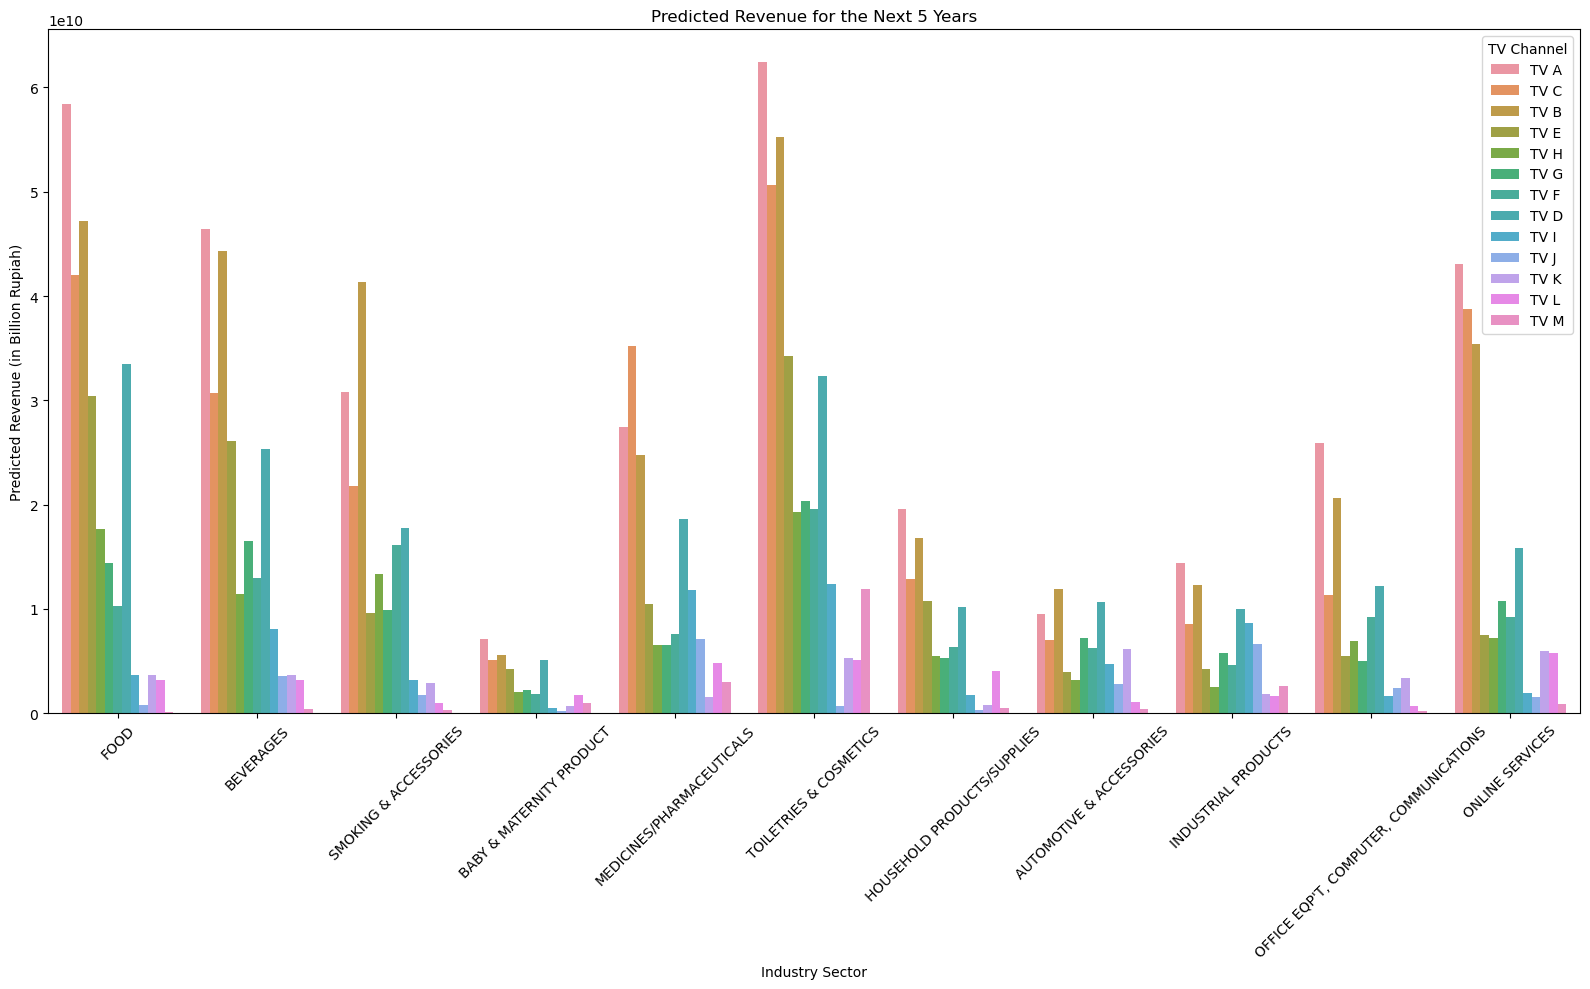

In [30]:
#5. Forecast estimated revenue for the next 5 years
plt.figure(figsize=(16, 10))
sns.barplot(data=future_data, x='INDUSTRY SECTOR', y='REVENUE_PREDICTED', hue='TV CHANNEL')
plt.title('Predicted Revenue for the Next 5 Years')
plt.xlabel('Industry Sector')
plt.ylabel('Predicted Revenue (in Billion Rupiah)')
plt.xticks(rotation=45)
plt.legend(title='TV Channel')
plt.tight_layout()
plt.show()

C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_6552\1387064182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = future_data.pivot('INDUSTRY SECTOR', 'TV CHANNEL', 'REVENUE_PREDICTED')


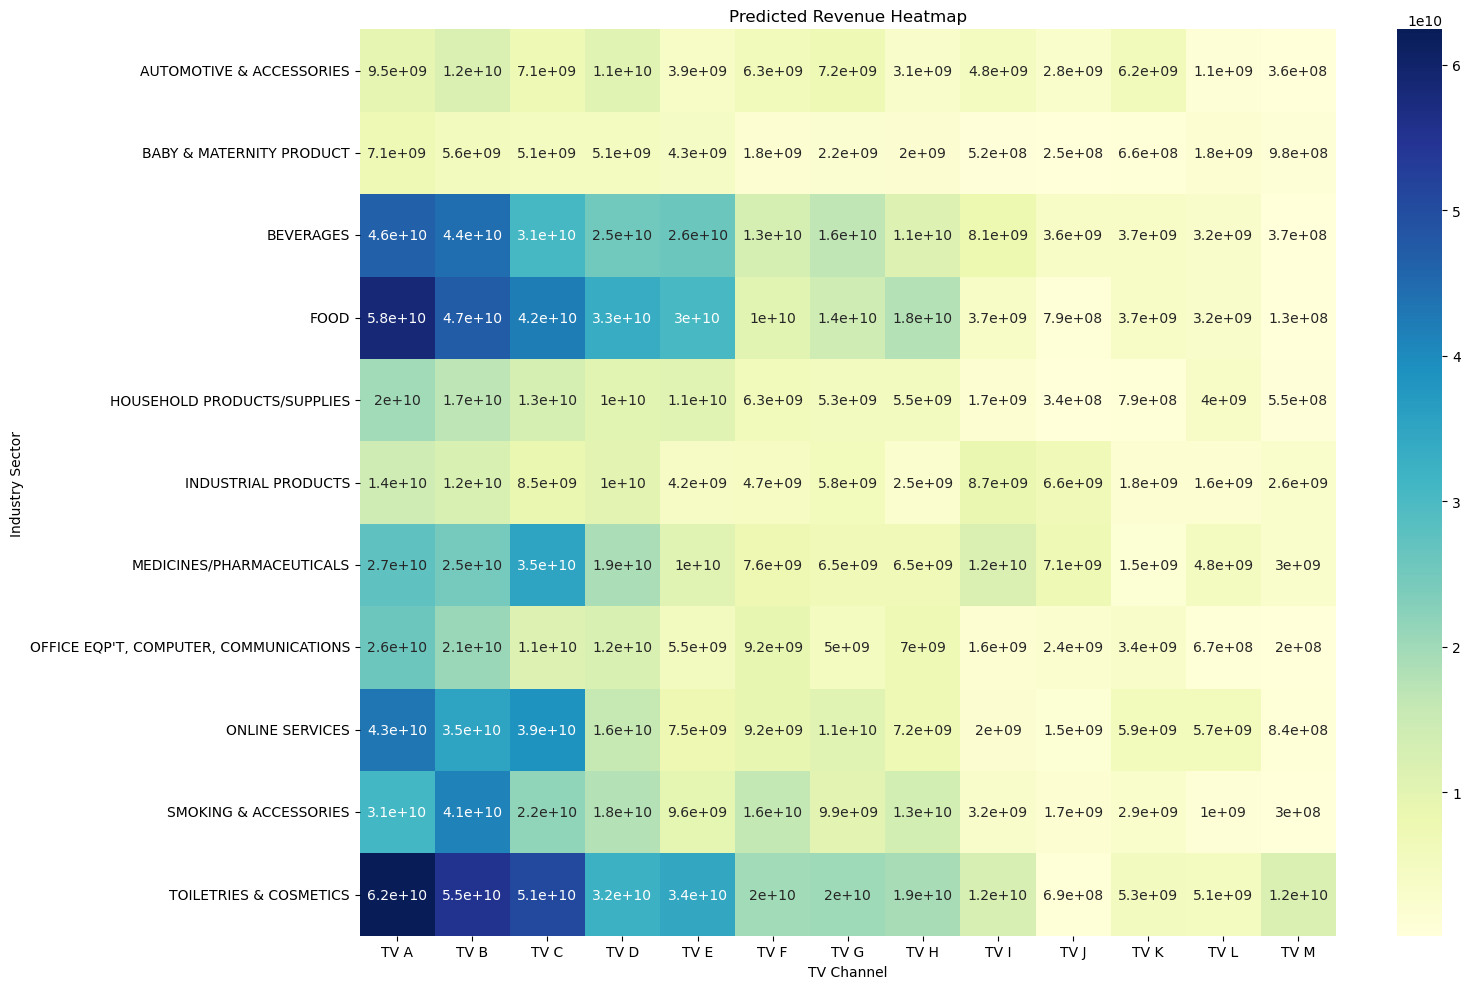

In [31]:
#5. Forecast estimated revenue for the next 5 years
pivot_data = future_data.pivot('INDUSTRY SECTOR', 'TV CHANNEL', 'REVENUE_PREDICTED')
plt.figure(figsize=(16, 10))
sns.heatmap(data=pivot_data, annot=True, cmap='YlGnBu')
plt.title('Predicted Revenue Heatmap')
plt.xlabel('TV Channel')
plt.ylabel('Industry Sector')
plt.tight_layout()
plt.show()

In [33]:
#5. Forecast estimated revenue for the next 5 years
max_revenue = future_data['REVENUE_PREDICTED'].max()
max_revenue

62442309303.72764

In [34]:
#5. Forecast estimated revenue for the next 5 years
min_revenue = future_data['REVENUE_PREDICTED'].min()
min_revenue

128307780.11204481